# create a lamp template by useing spectrum extracted and wavelength calibrated by iraf

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from astropy.io import fits
import numpy as np
from pyrafspec.fitslist import *
import matplotlib.pyplot as plt
import os
from PyAstronomy import pyasl
from astropy import coordinates as coord
import joblib
import collections
plt.style.use('lijiaostyle')

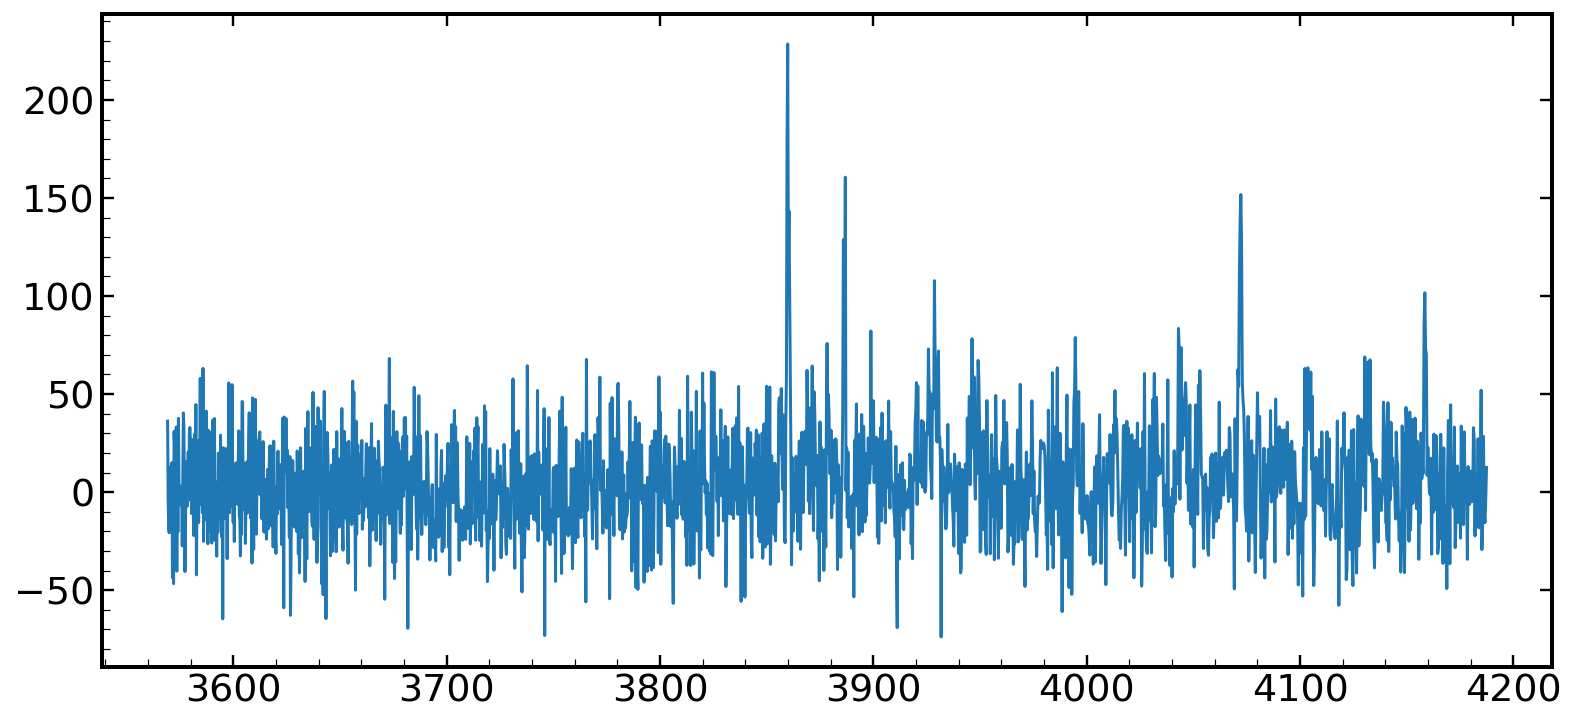

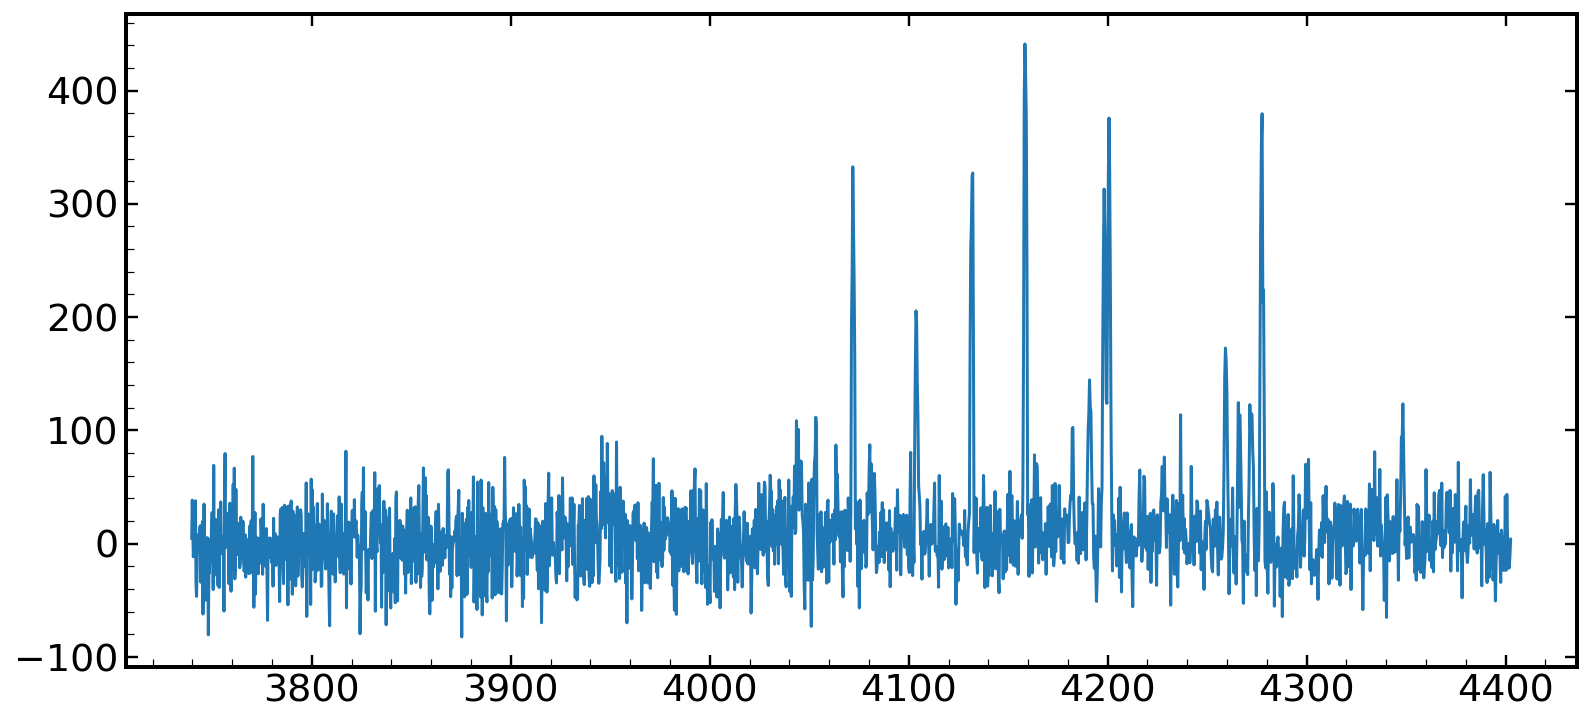

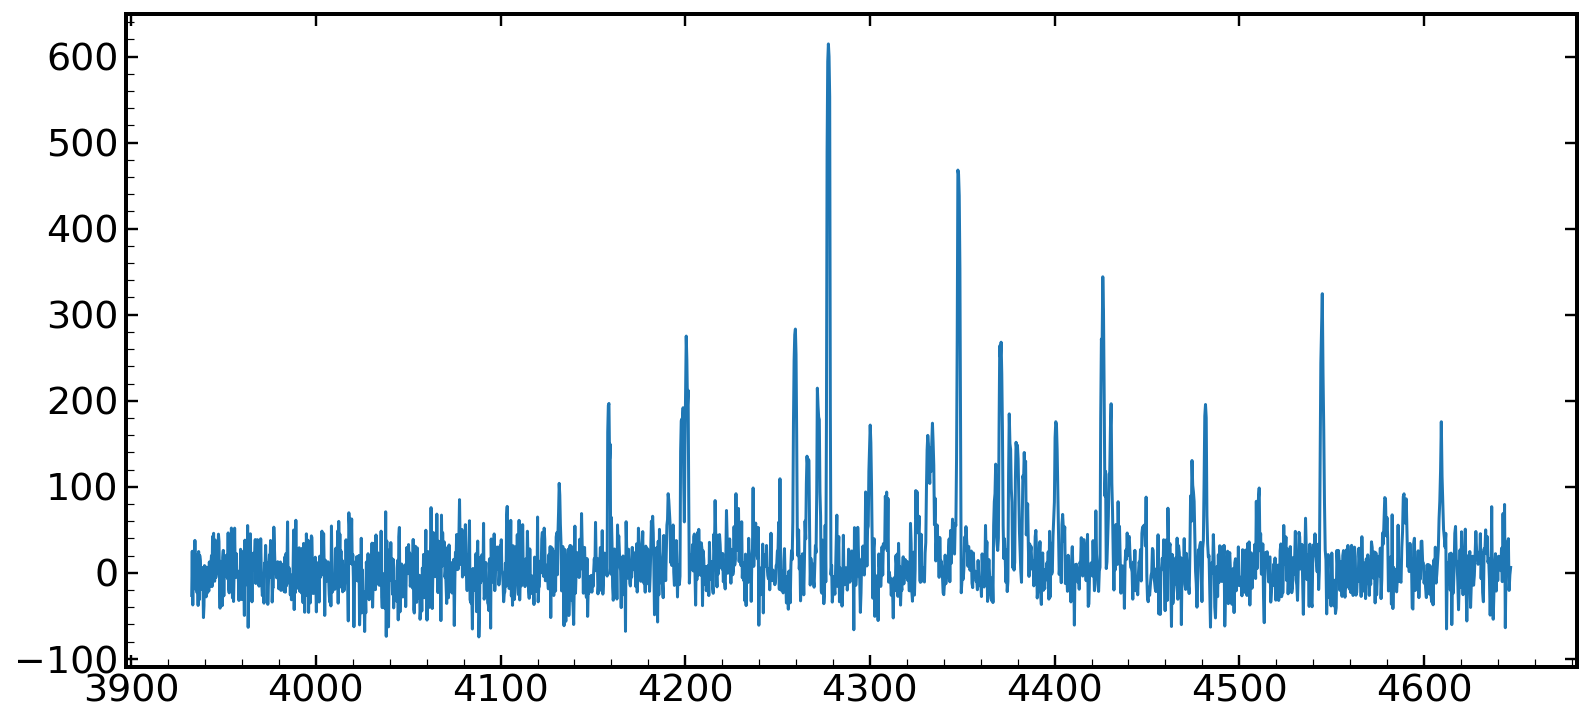

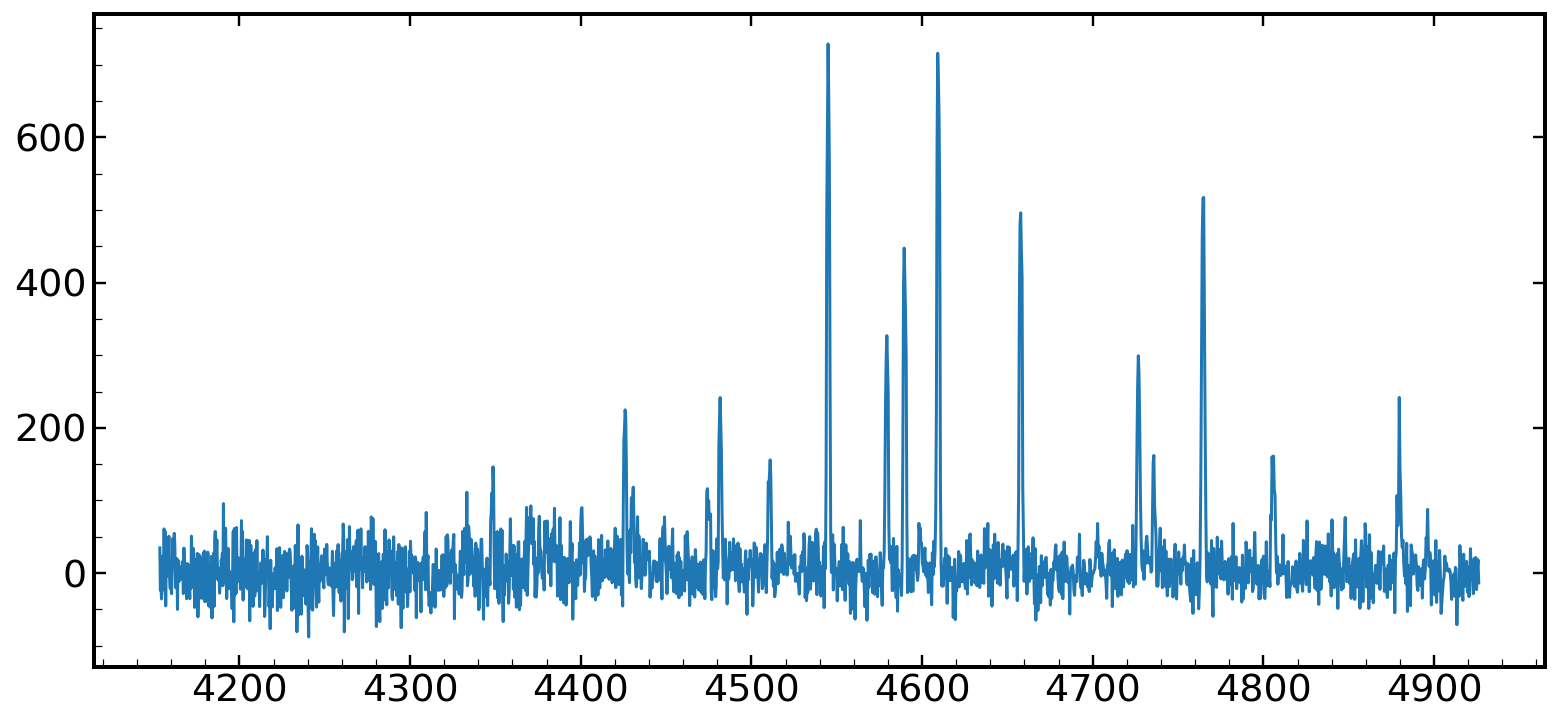

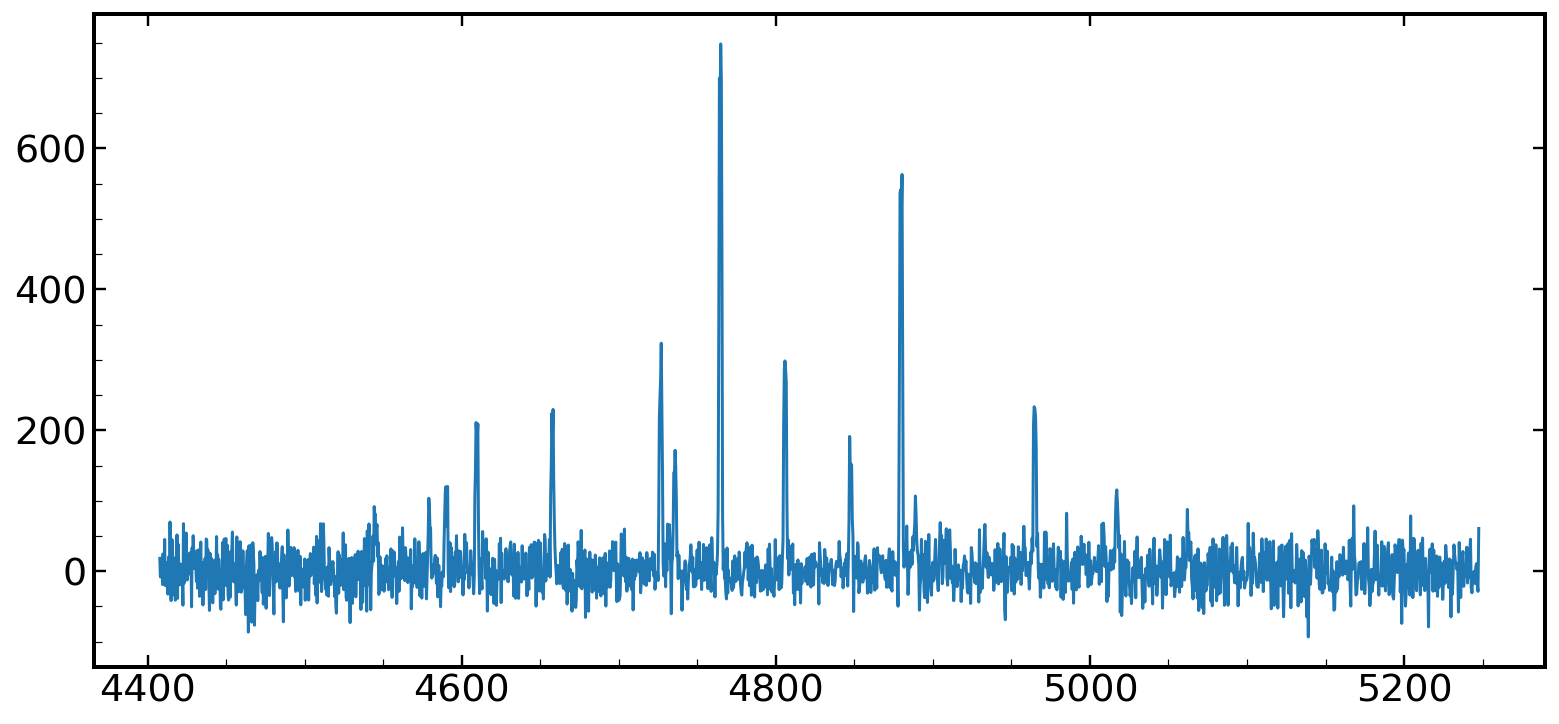

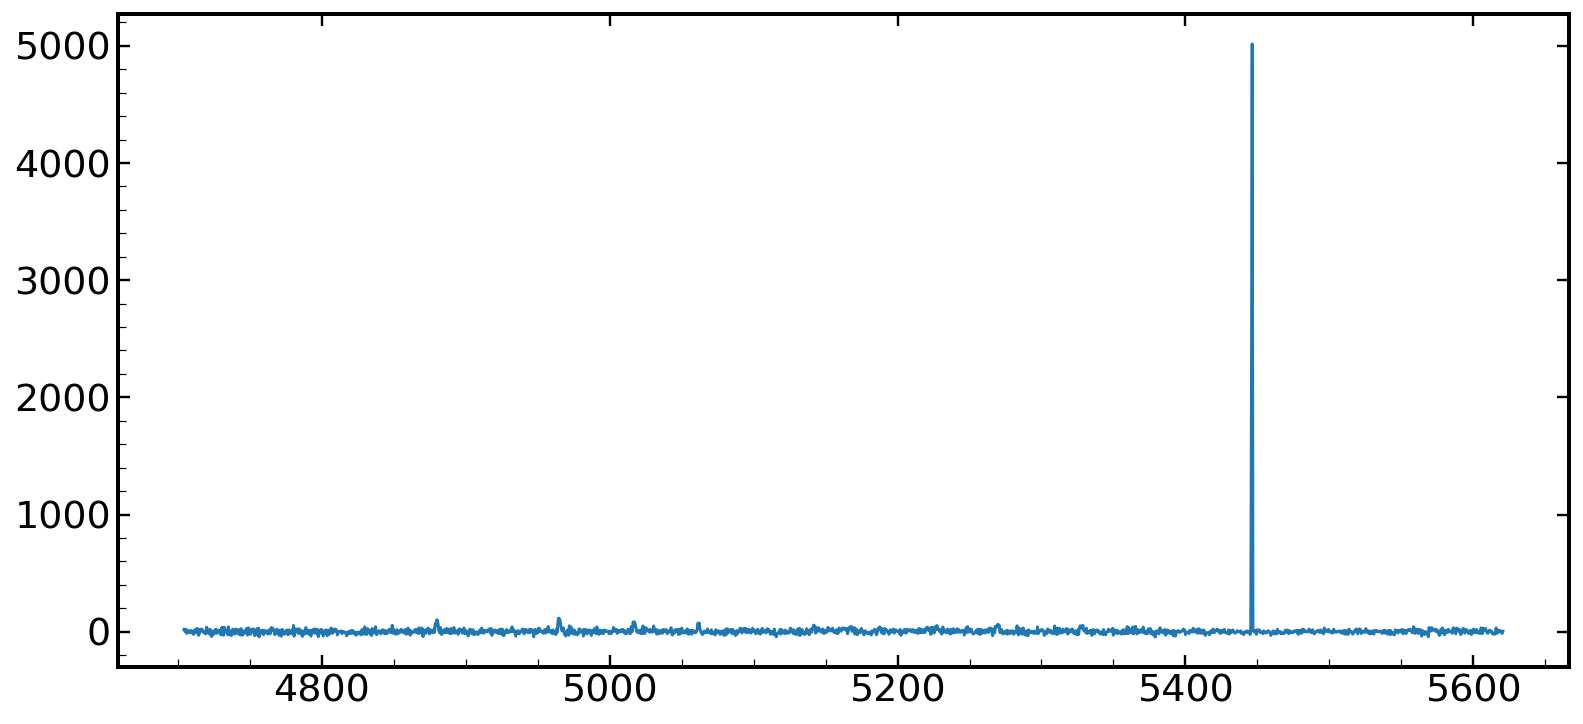

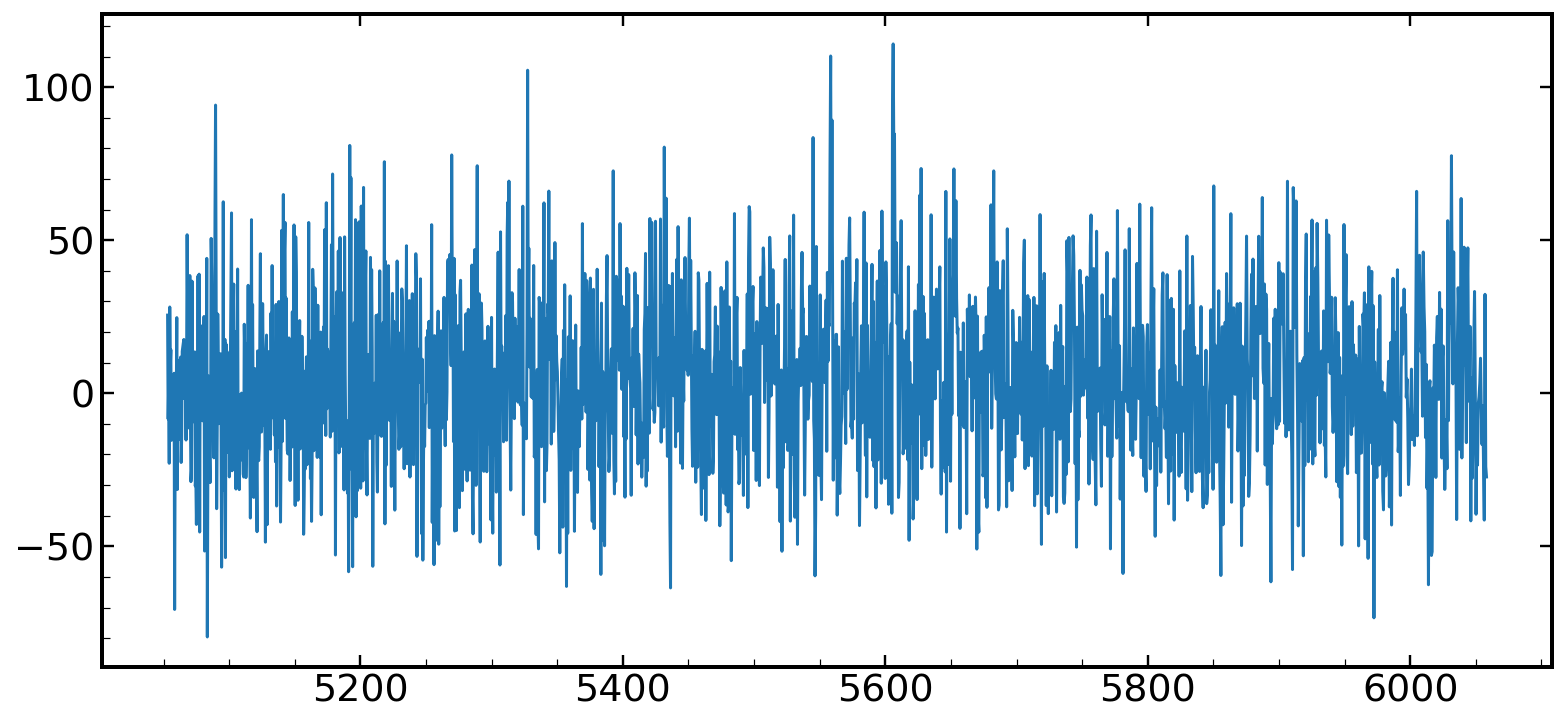

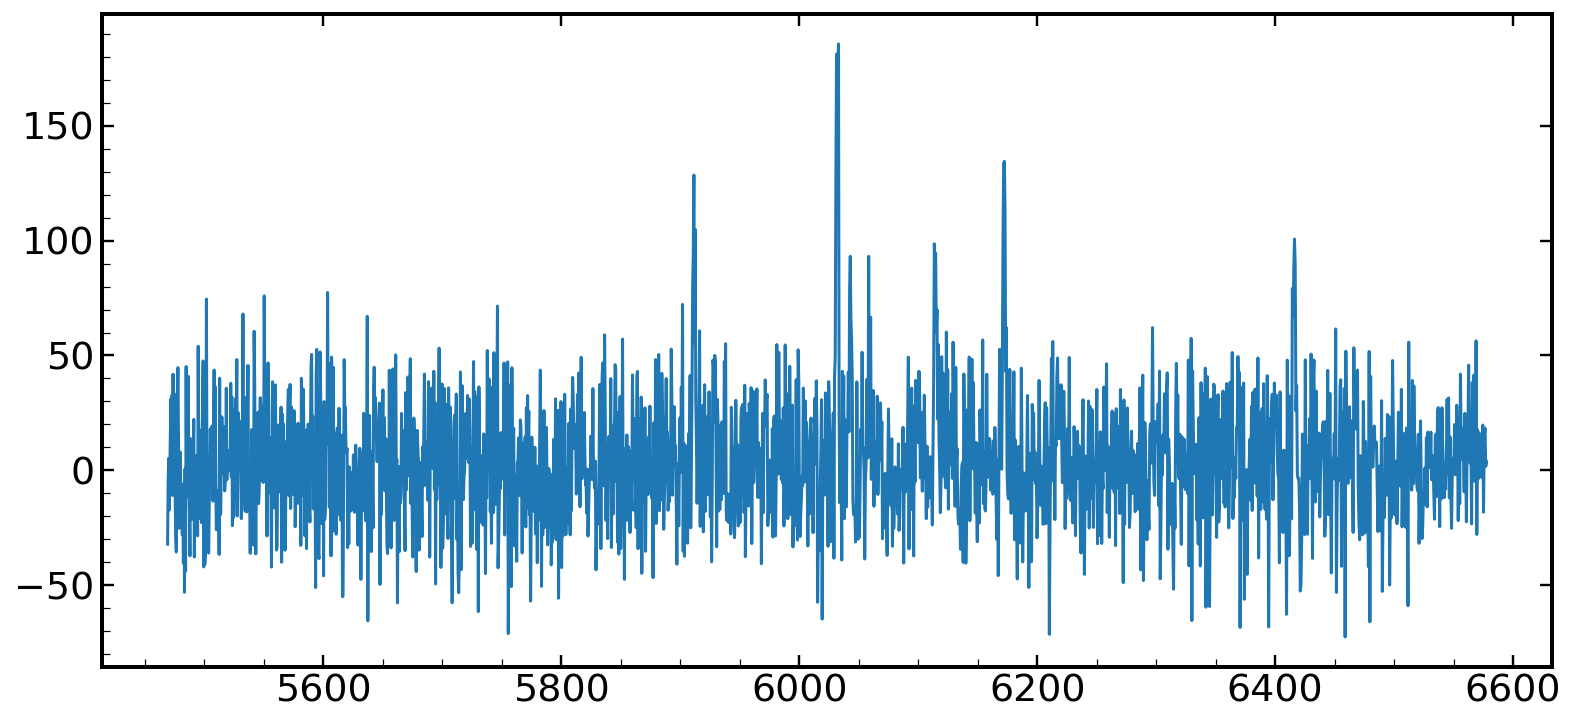

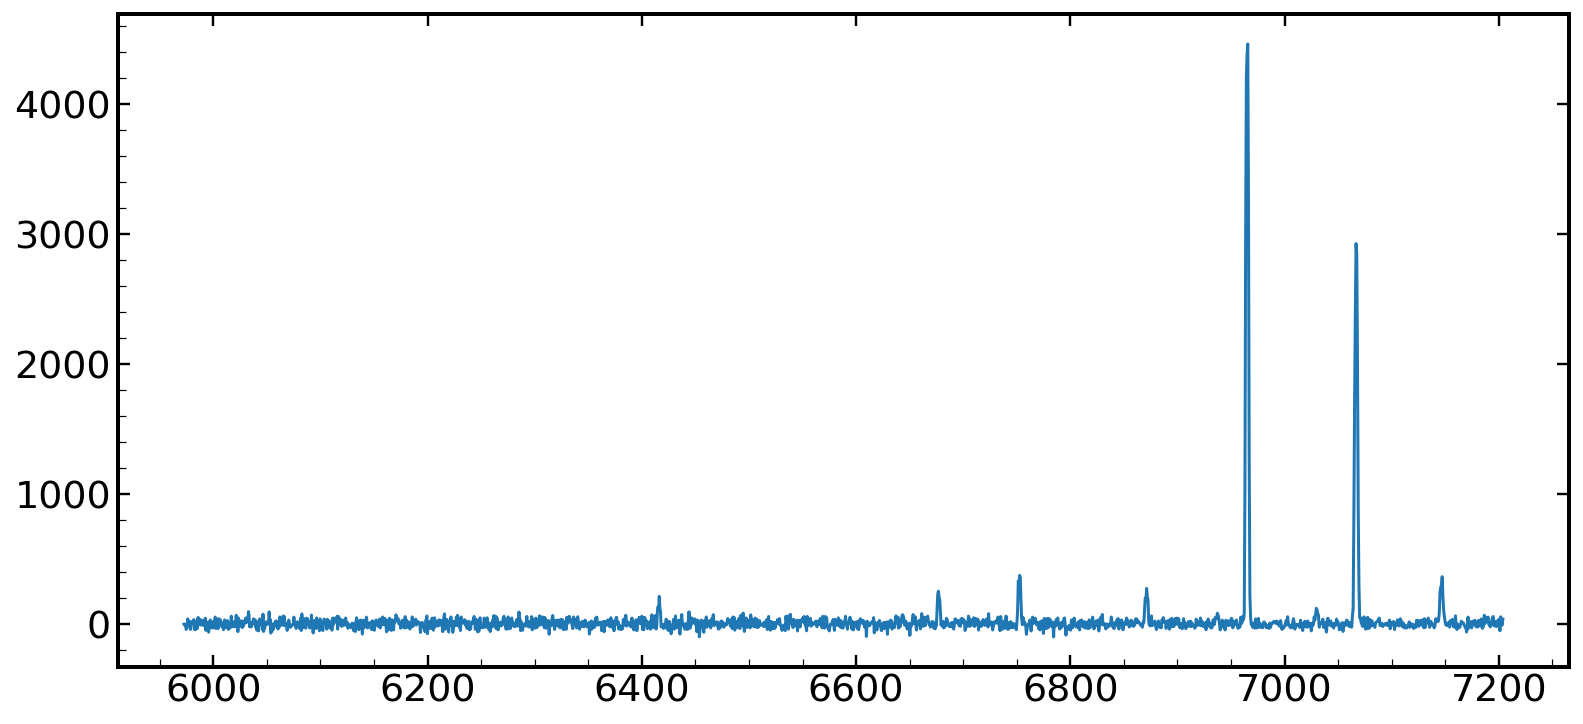

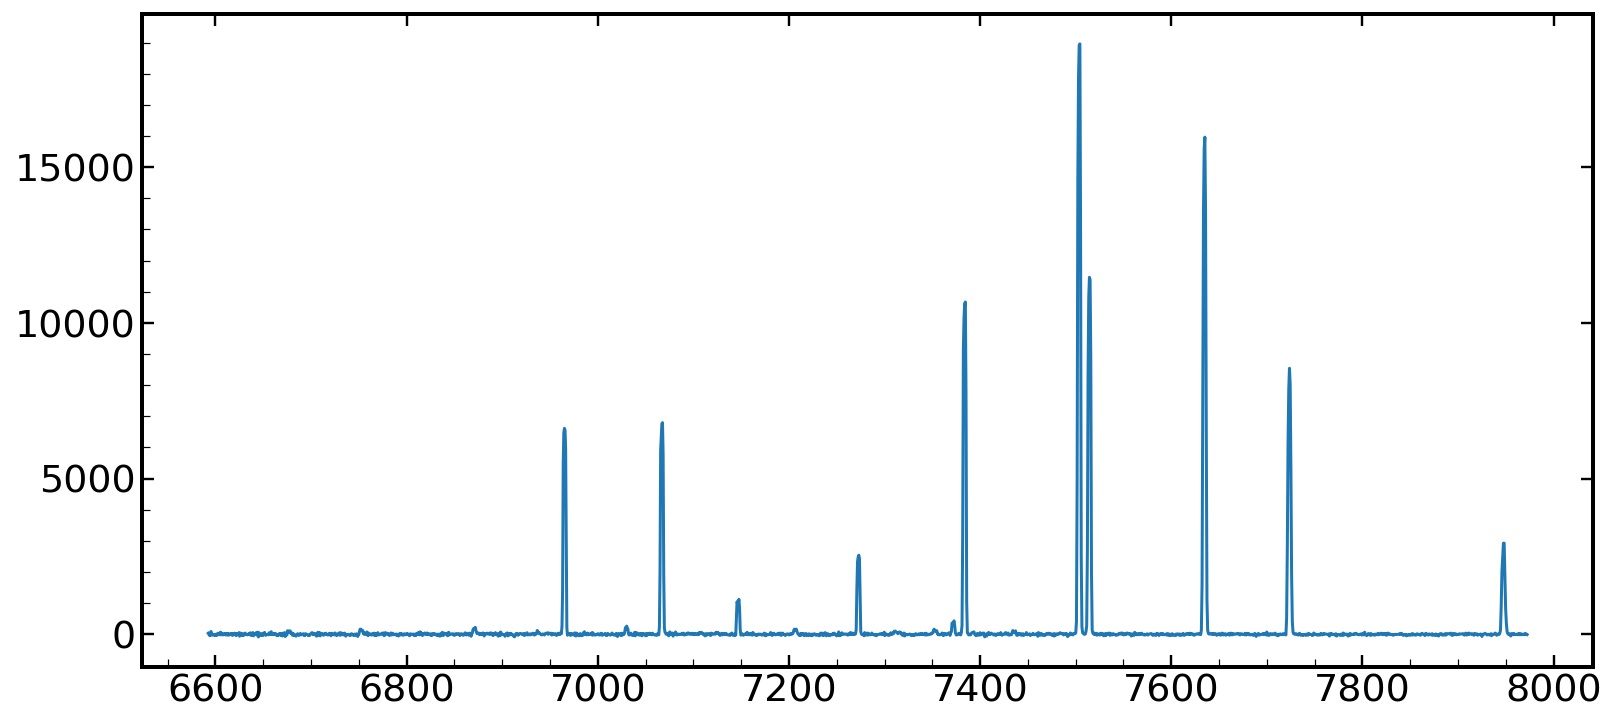

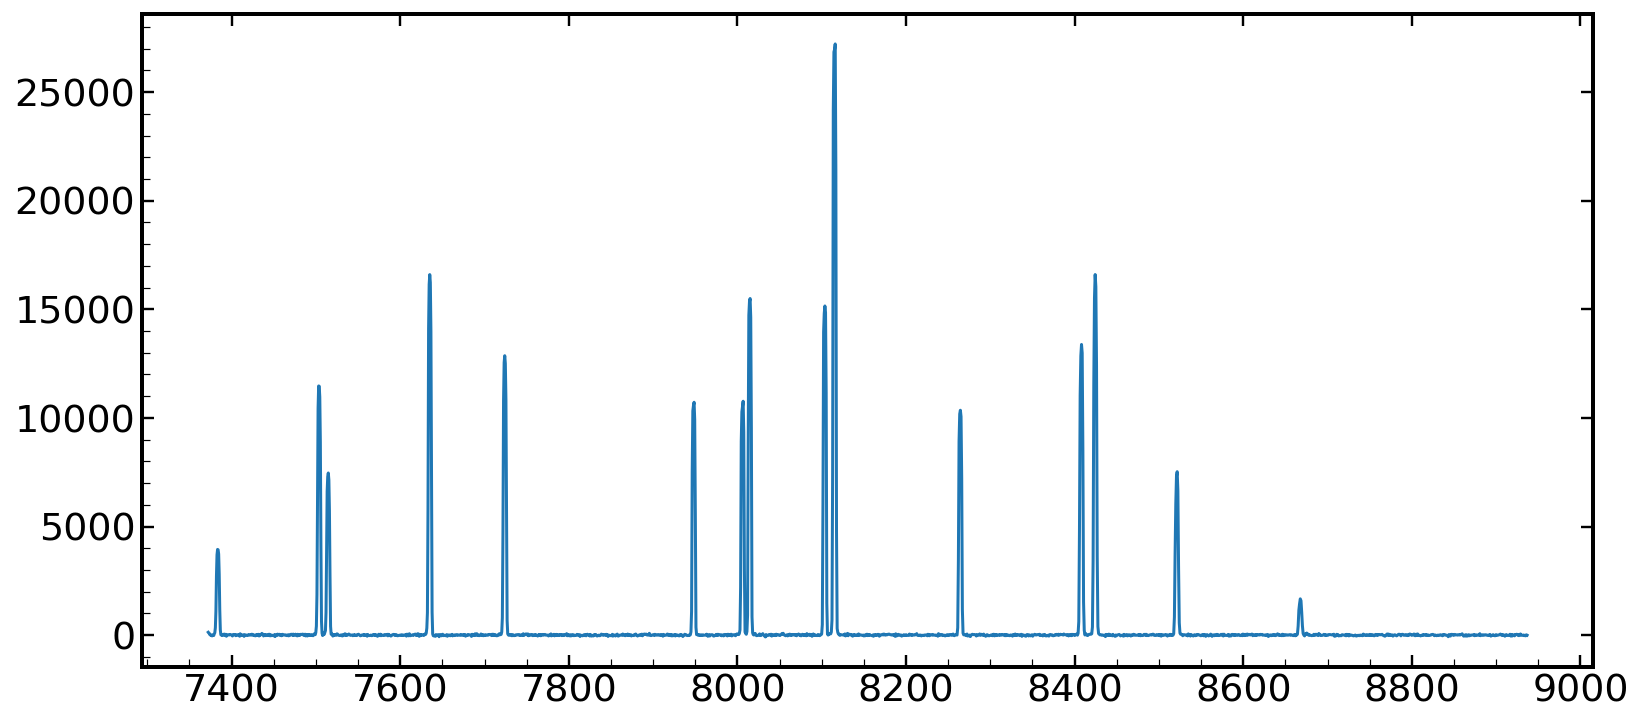

In [46]:
lamp = joblib.load('/home/lcq/Documents/bfosc_new/bfosc-main/E9G10/template/fear_model.dump')

for _i, _wave in enumerate(lamp['wave']):
    fig, ax = plt.subplots(1,1, figsize=(13,6),sharex=True)
    plt.plot(_wave, lamp['flux'][_i])

In [5]:
filename = '../data/template/202110230014_btf_acw.fits'
data,head = fits.getdata(filename,header=True)

In [6]:
multispec_items = MultiSpecItem.get_wat2(head)

In [7]:
orders = [1,2,3,4,5,6,7,8,9,10,11]
waves = np.zeros(data[0].shape,dtype=np.float32)
for _i, _order in enumerate(orders):
    waves[_i] = multispec_items[_order].get_wv()
    

In [8]:
img0 = fits.getdata('../data/template/202110230014.fit')

In [9]:
img = img0[800:2011, 15:2021]

In [10]:
data = fits.getdata('../data/template/202110230014_btf_acw.fits')

In [11]:
aa = [800, 2011]
np.diff(aa)[0]

1211

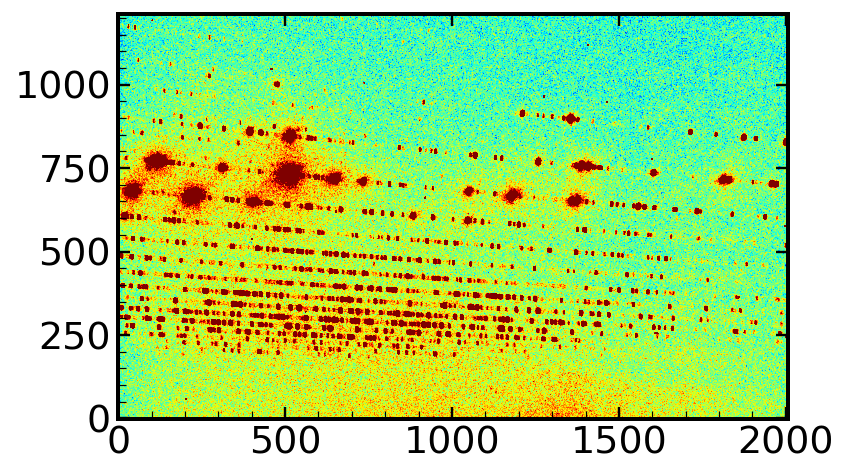

In [12]:
plt.imshow(img, cmap=plt.cm.jet, origin="lower", vmin=np.percentile(img,5), vmax=np.percentile(img, 90), )

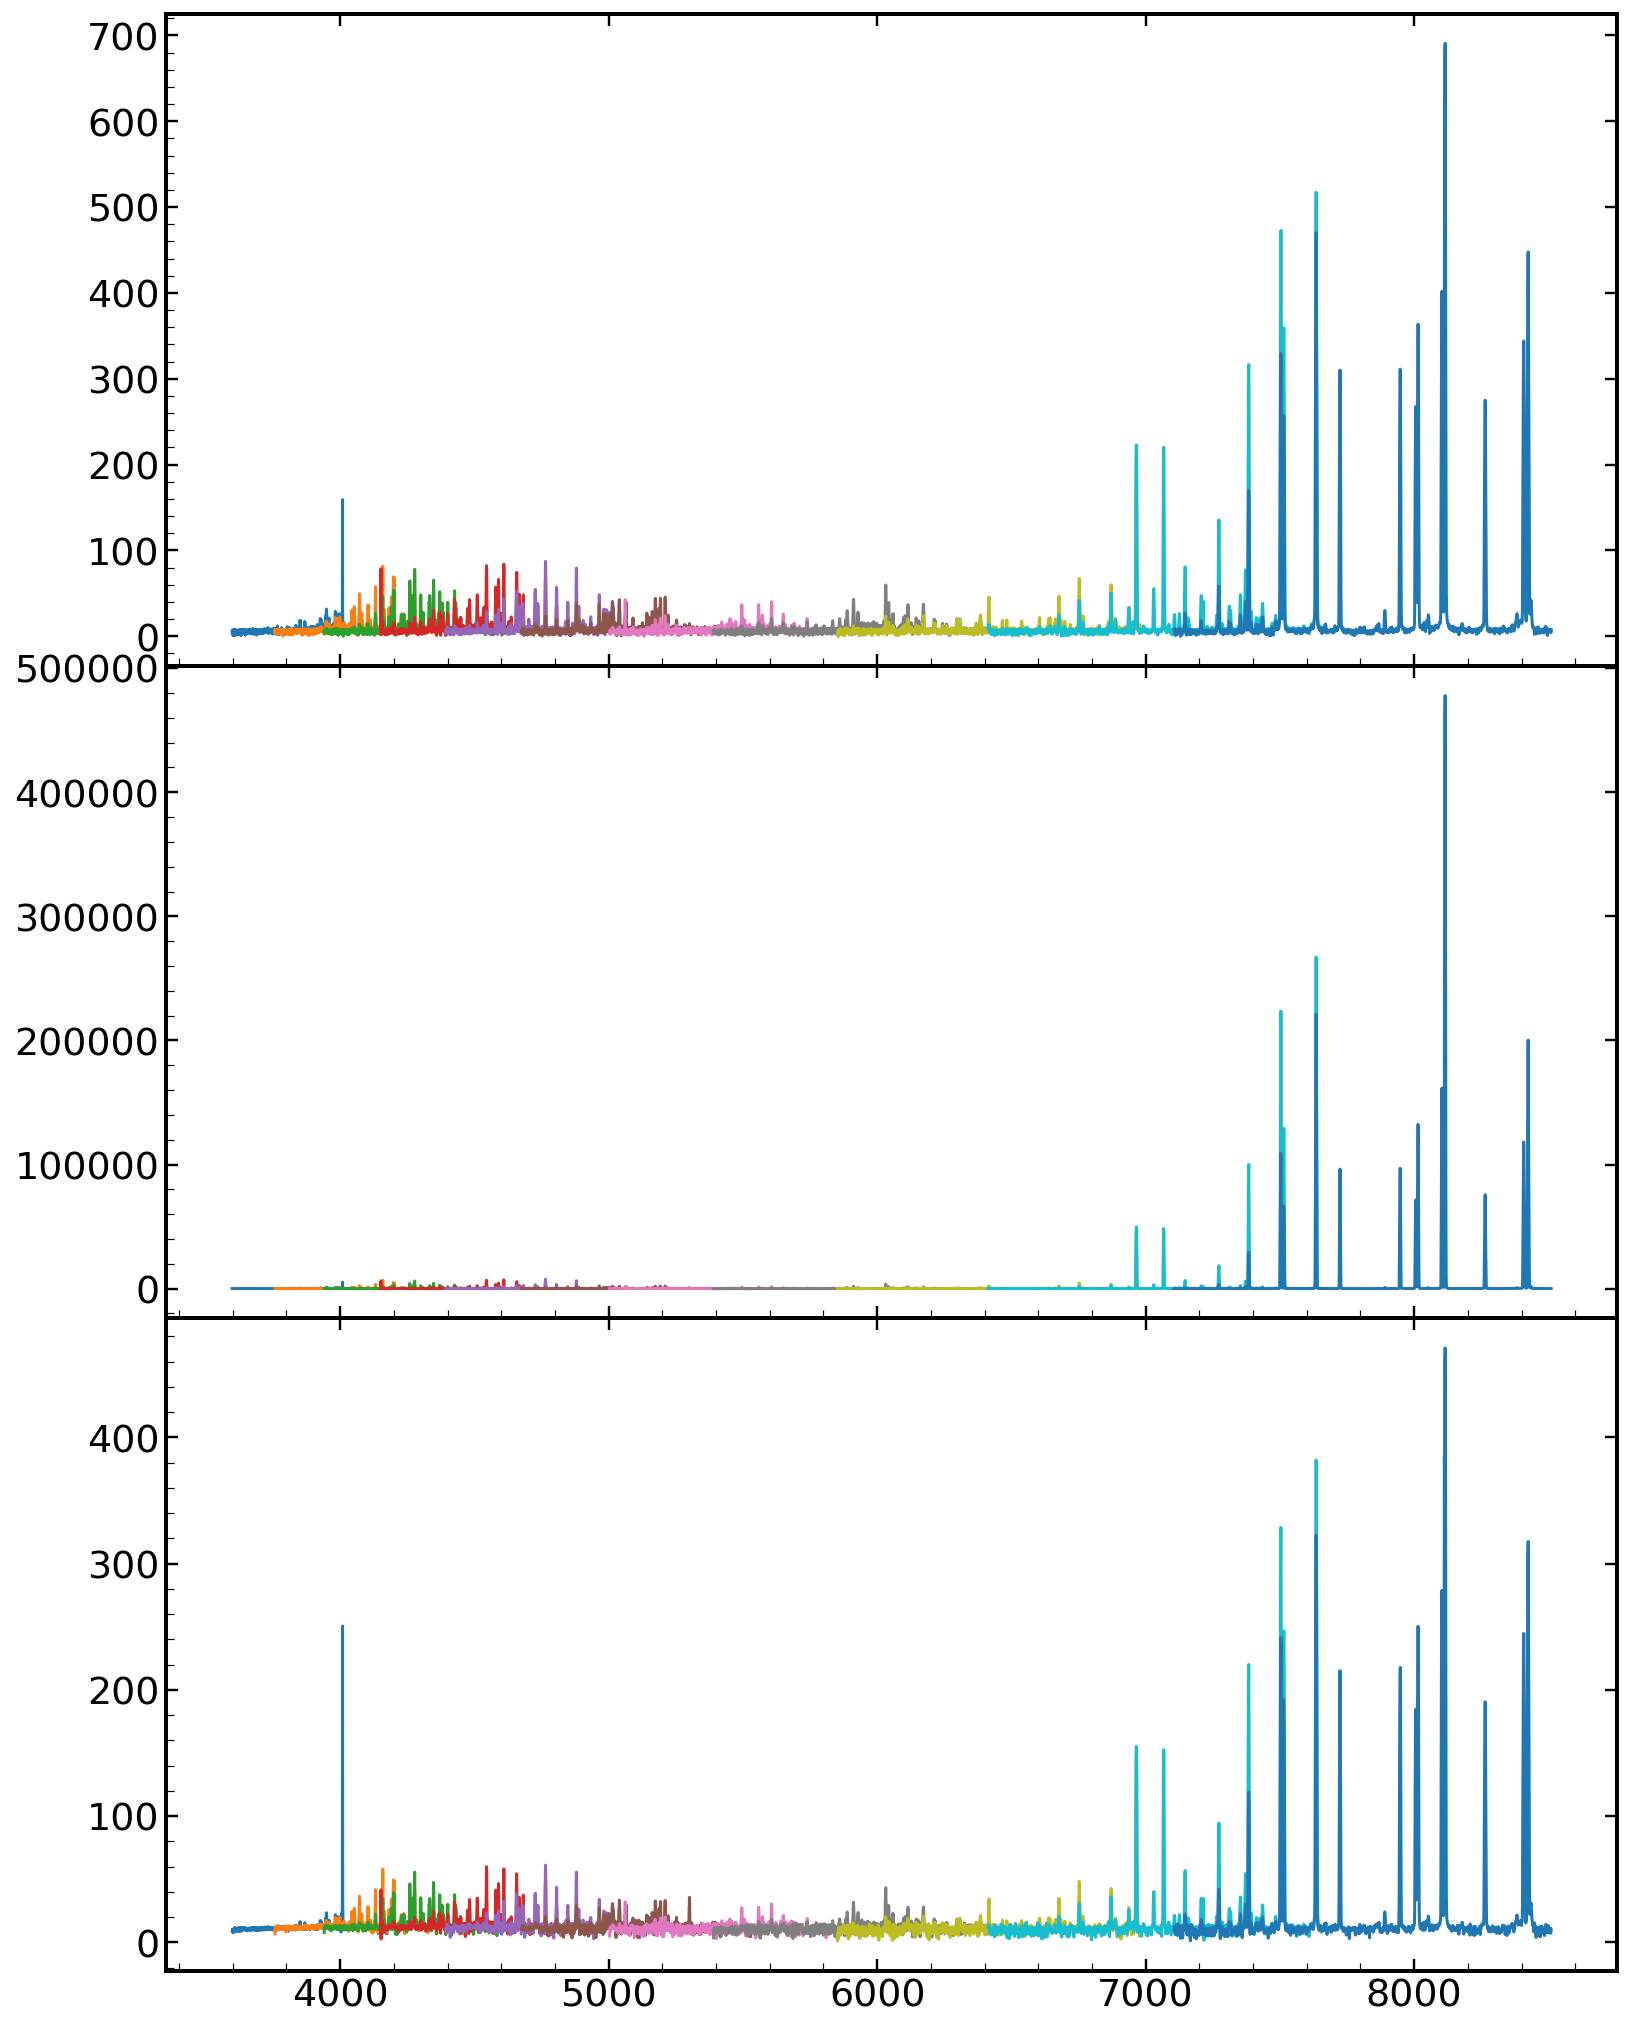

In [13]:
fig, ax = plt.subplots(3,1, figsize=(13,18),sharex=True)
plt.subplots_adjust(hspace=0)
plt.sca(ax[0])
plt.plot(waves.T, np.sqrt(data[0]).T)
plt.sca(ax[1])
plt.plot(waves.T, data[1].T)
plt.sca(ax[2])
plt.plot(waves.T, data[2].T)

# compare the lamps extracted from iraf (operated by Luo Changqing) and bfosc(Zhang Bo's code)

In [15]:
dumpdata = joblib.load('/home/lcq/media/backup/216BFOSC/20211023_bfosc/test/star-202110230014_SPECSLAMP_FeAr_slit16s_G10_E9.fit.dump')

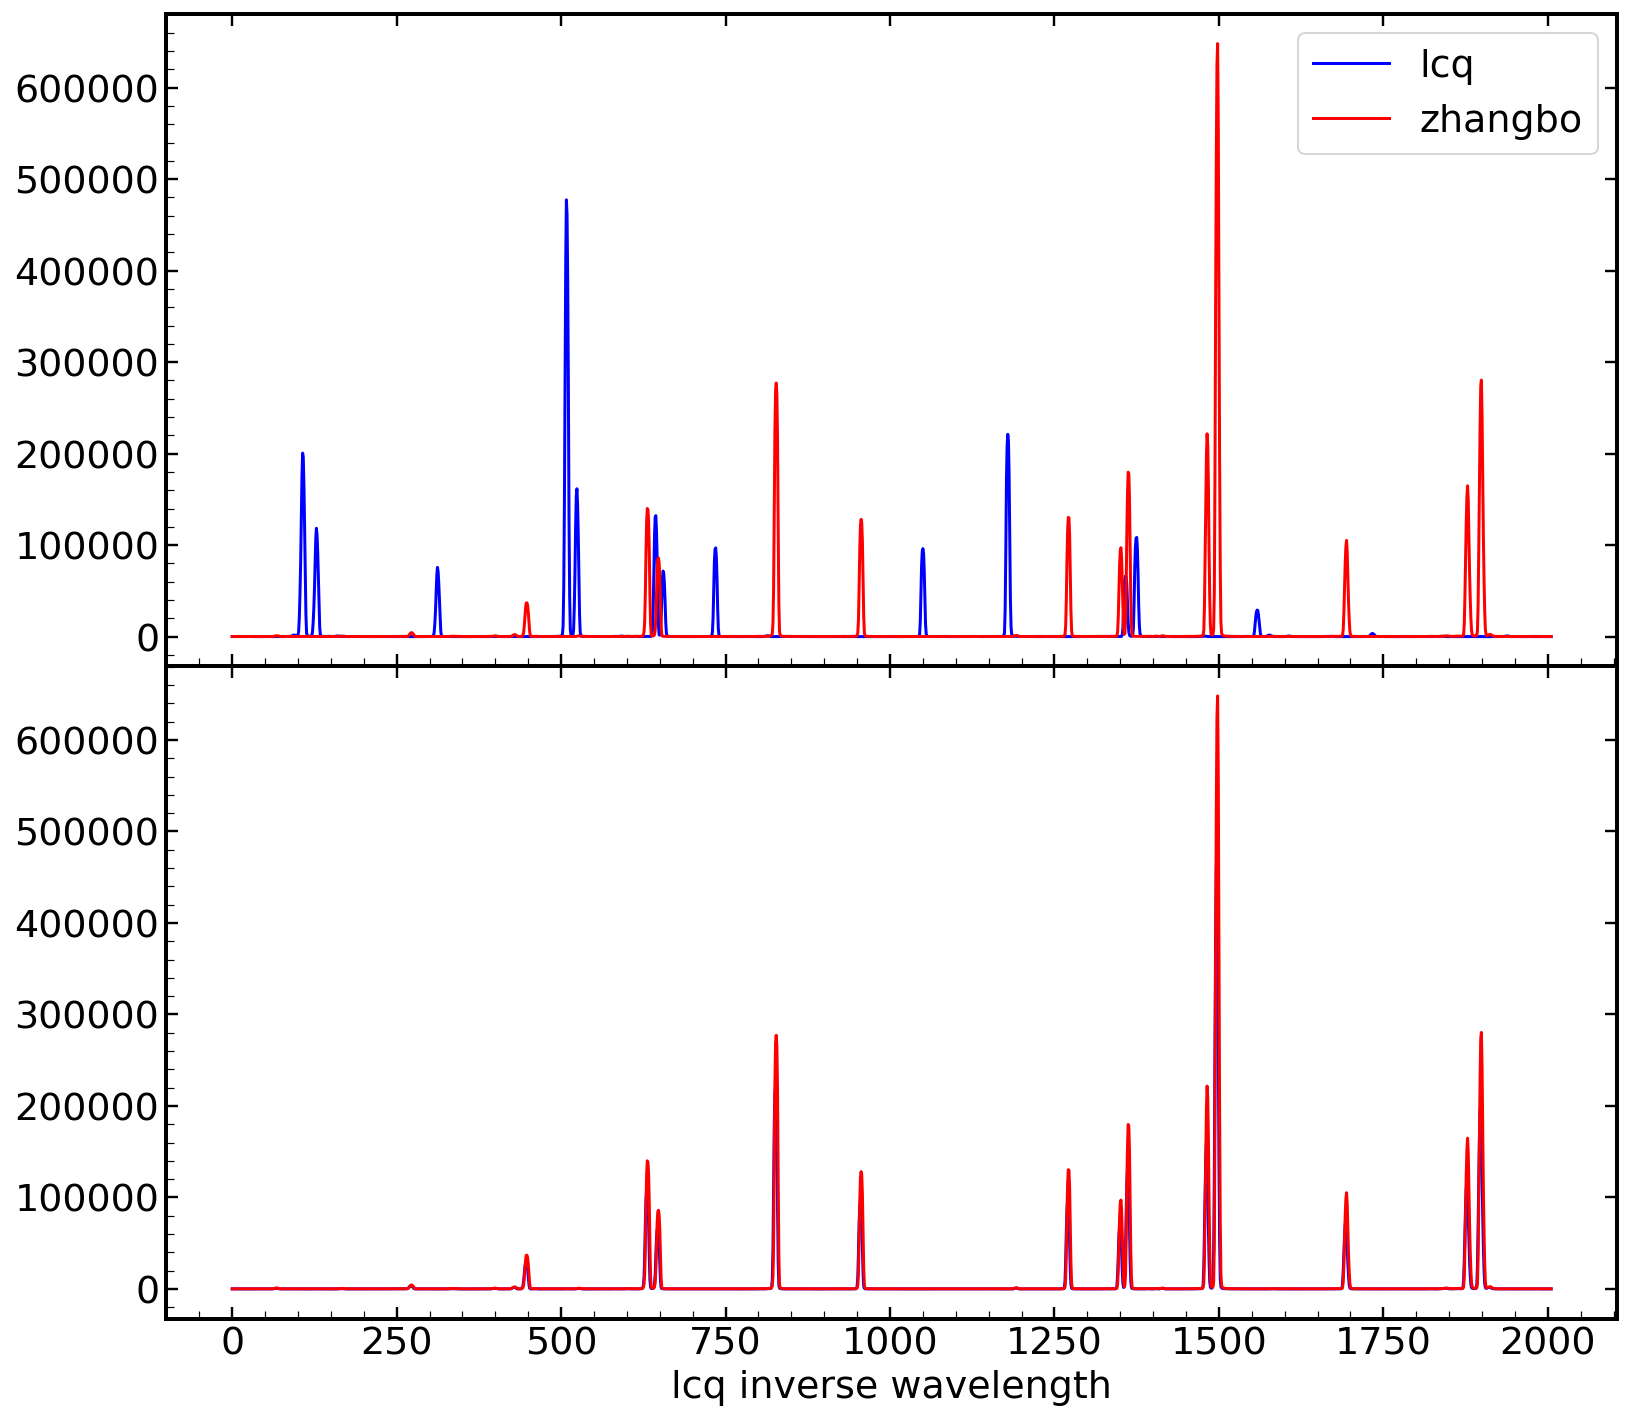

In [16]:
fig, ax = plt.subplots(2,1, figsize=(13,12),sharex=True)
plt.subplots_adjust(hspace=0)
_ilcq = 5+5
_iz = 3+5
plt.sca(ax[0])
plt.plot(data[0][_ilcq], 'b', label='lcq')
plt.plot(dumpdata['spec_sum'][_iz], 'r', label='zhangbo')
plt.legend()

plt.sca(ax[1])
plt.xlabel('lcq inverse wavelength')
plt.plot(data[0][_ilcq][::-1], 'b')
plt.plot(dumpdata['spec_sum'][_iz], 'r')

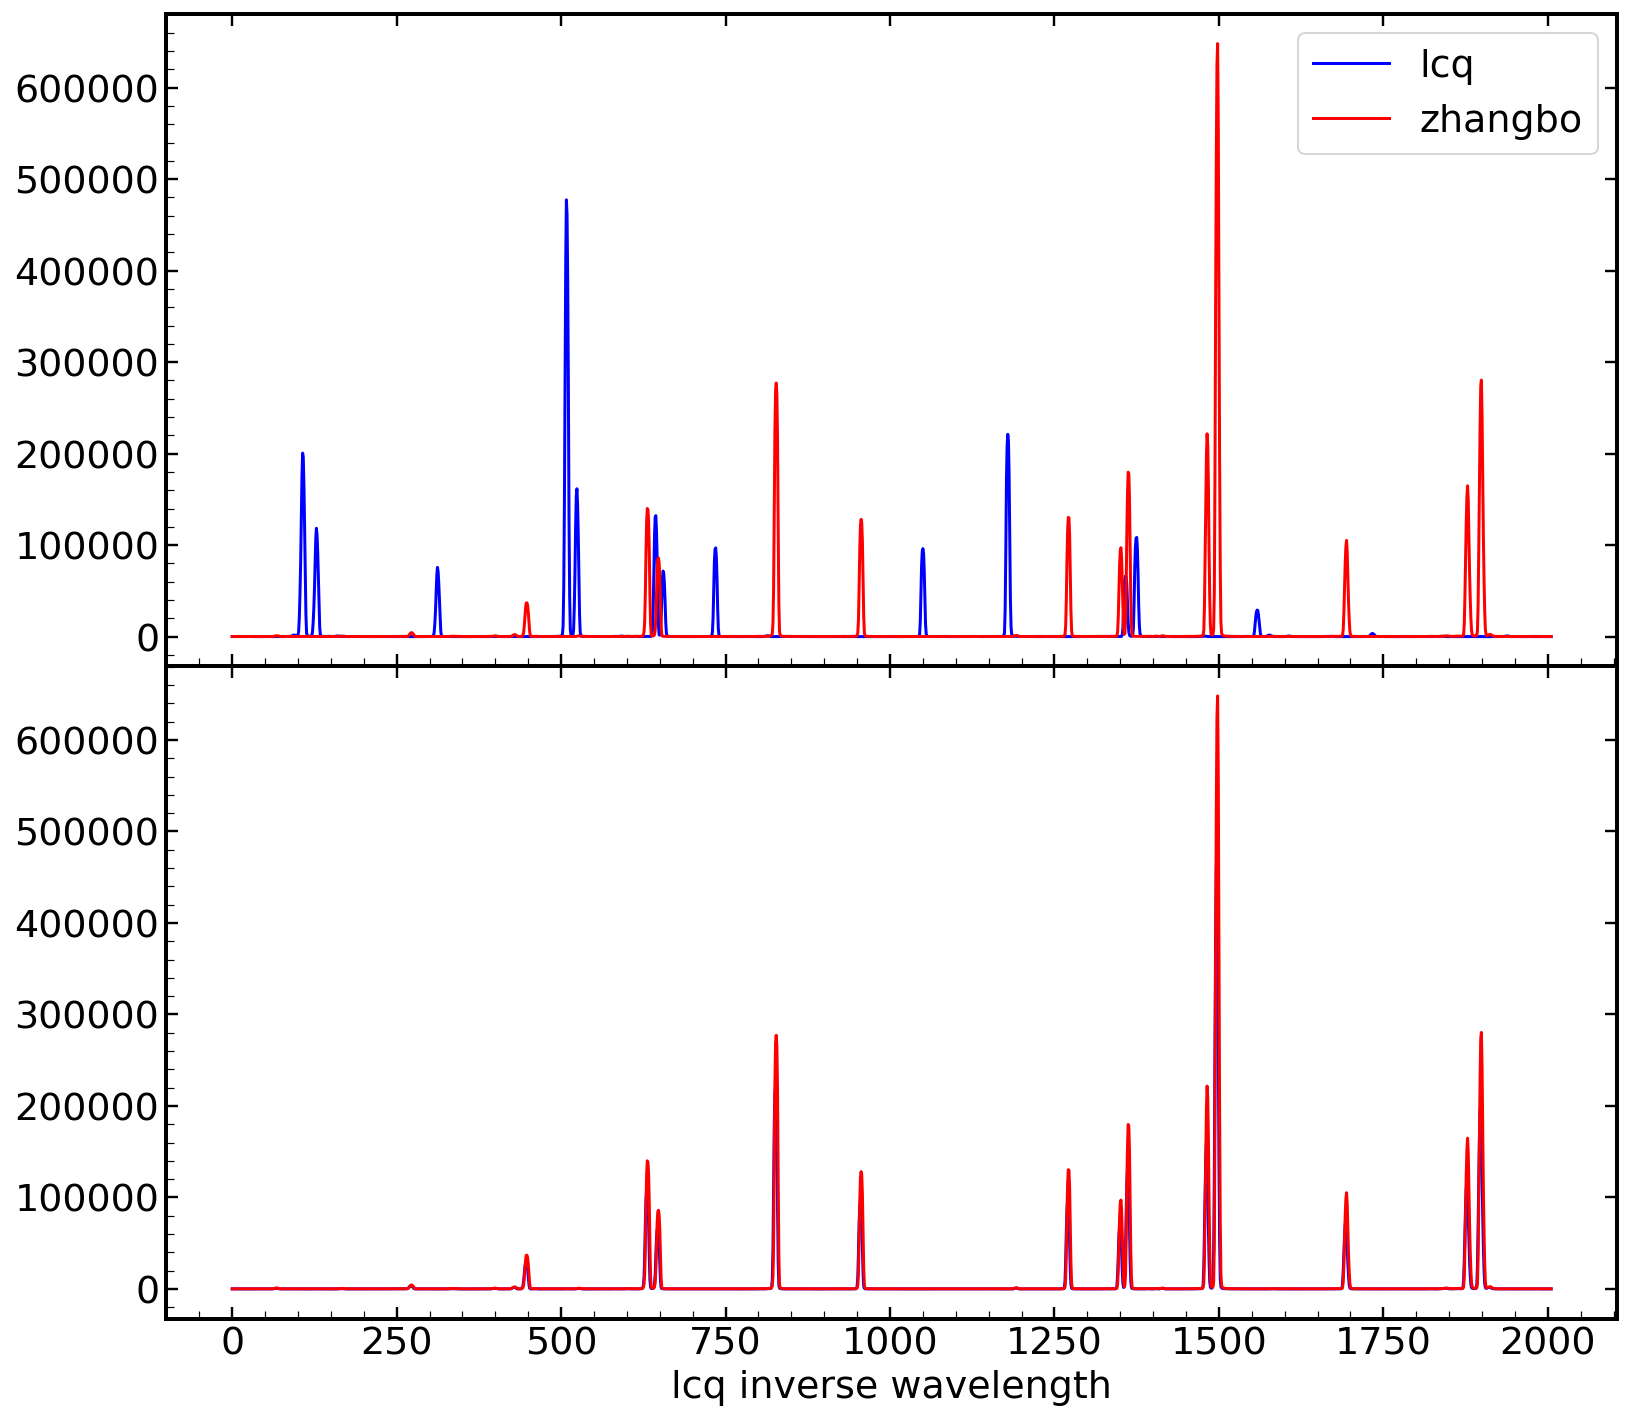

In [21]:
fig, ax = plt.subplots(2,1, figsize=(13,12),sharex=True)
plt.subplots_adjust(hspace=0)
_ilcq = 5+5
_iz = 3+5
plt.sca(ax[0])
plt.plot(data[0][_ilcq], 'b', label='lcq')
plt.plot(dumpdata['spec_sum'][_iz], 'r', label='zhangbo')
plt.legend()

plt.sca(ax[1])
plt.xlabel('lcq inverse wavelength')
plt.plot(data[0][_ilcq][::-1], 'b')
plt.plot(dumpdata['spec_sum'][_iz], 'r')

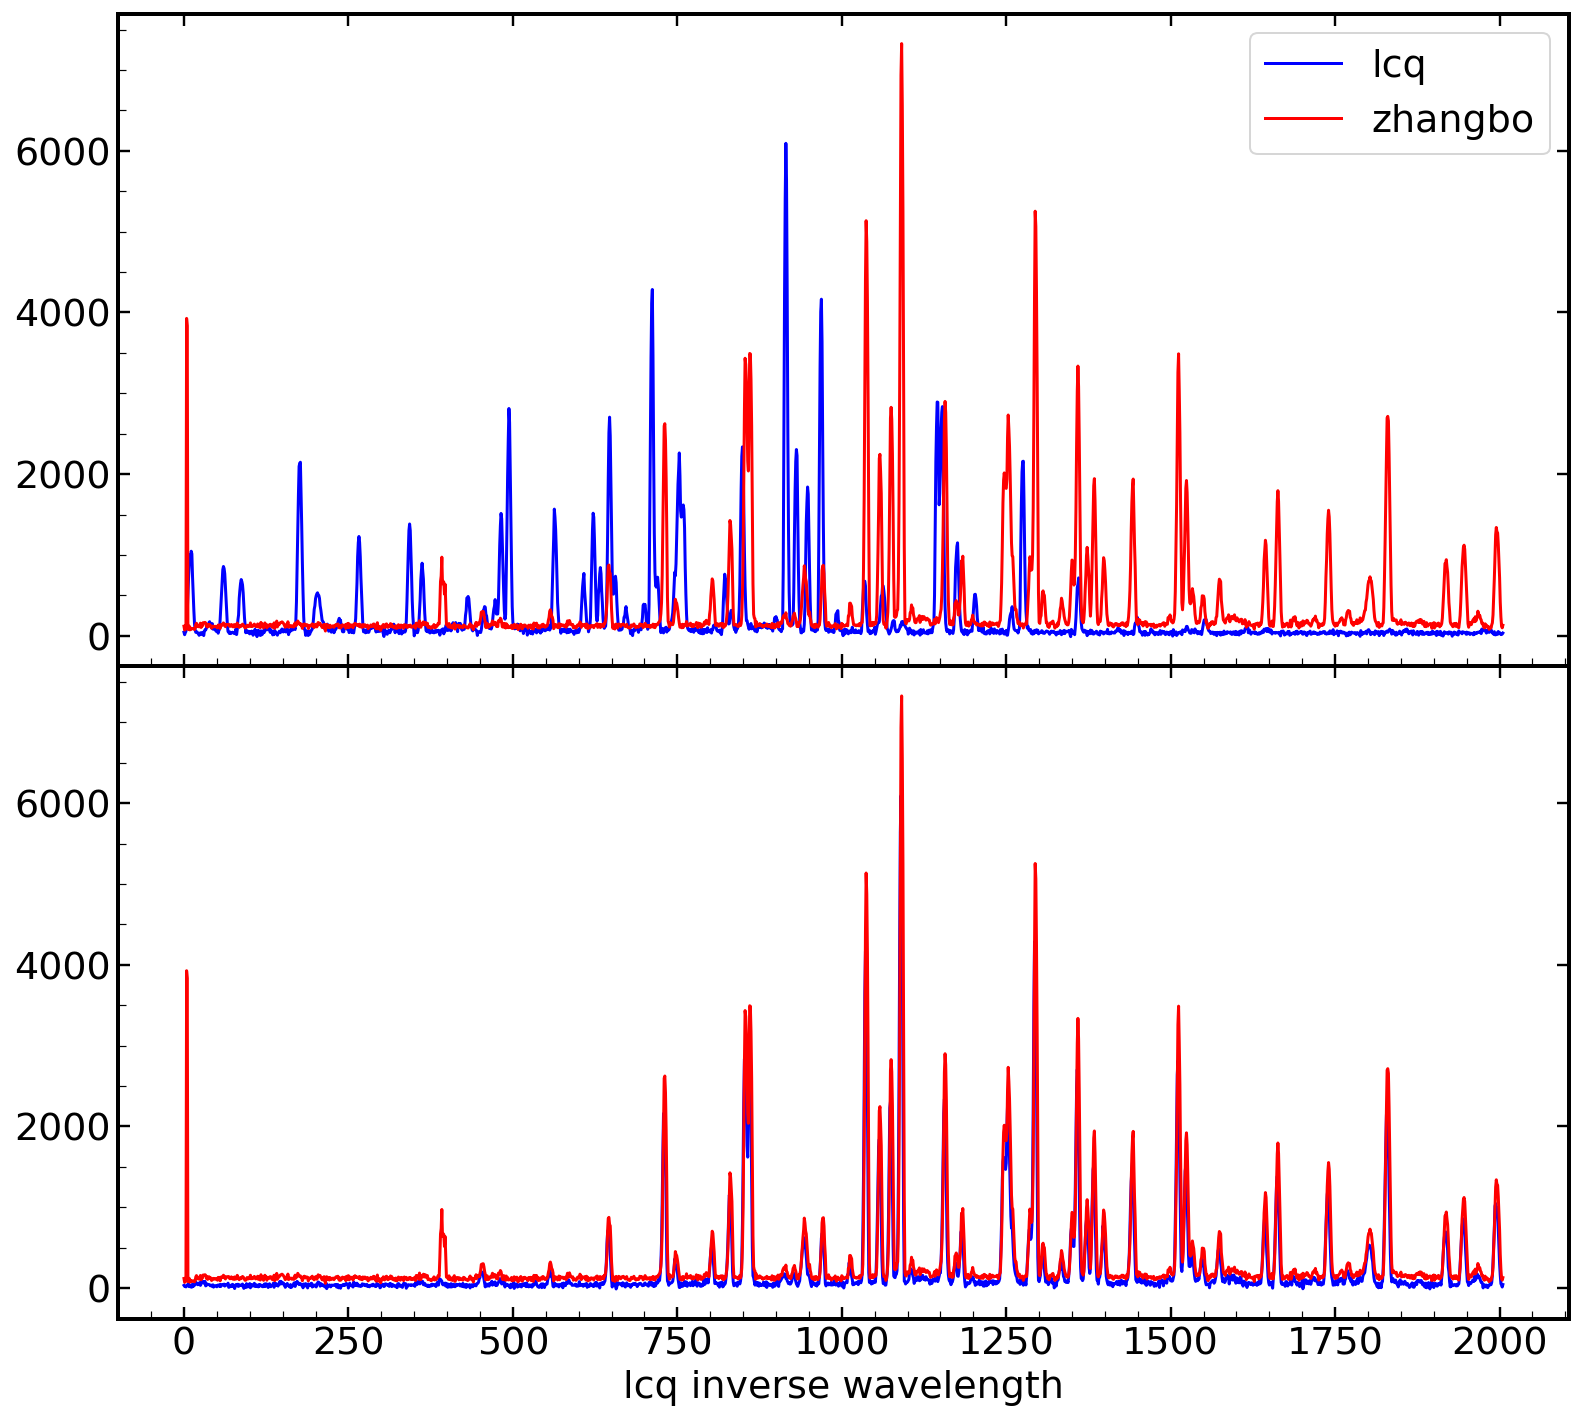

In [19]:
fig, ax = plt.subplots(2,1, figsize=(13,12),sharex=True)
plt.subplots_adjust(hspace=0)
_ilcq = 5-3
_iz = 3-3
plt.sca(ax[0])
plt.plot(data[0][_ilcq], 'b', label='lcq')
plt.plot(dumpdata['spec_sum'][_iz], 'r', label='zhangbo')
plt.legend()

plt.sca(ax[1])
plt.xlabel('lcq inverse wavelength')
plt.plot(data[0][_ilcq][::-1], 'b')
plt.plot(dumpdata['spec_sum'][_iz], 'r')

(9, 2006)

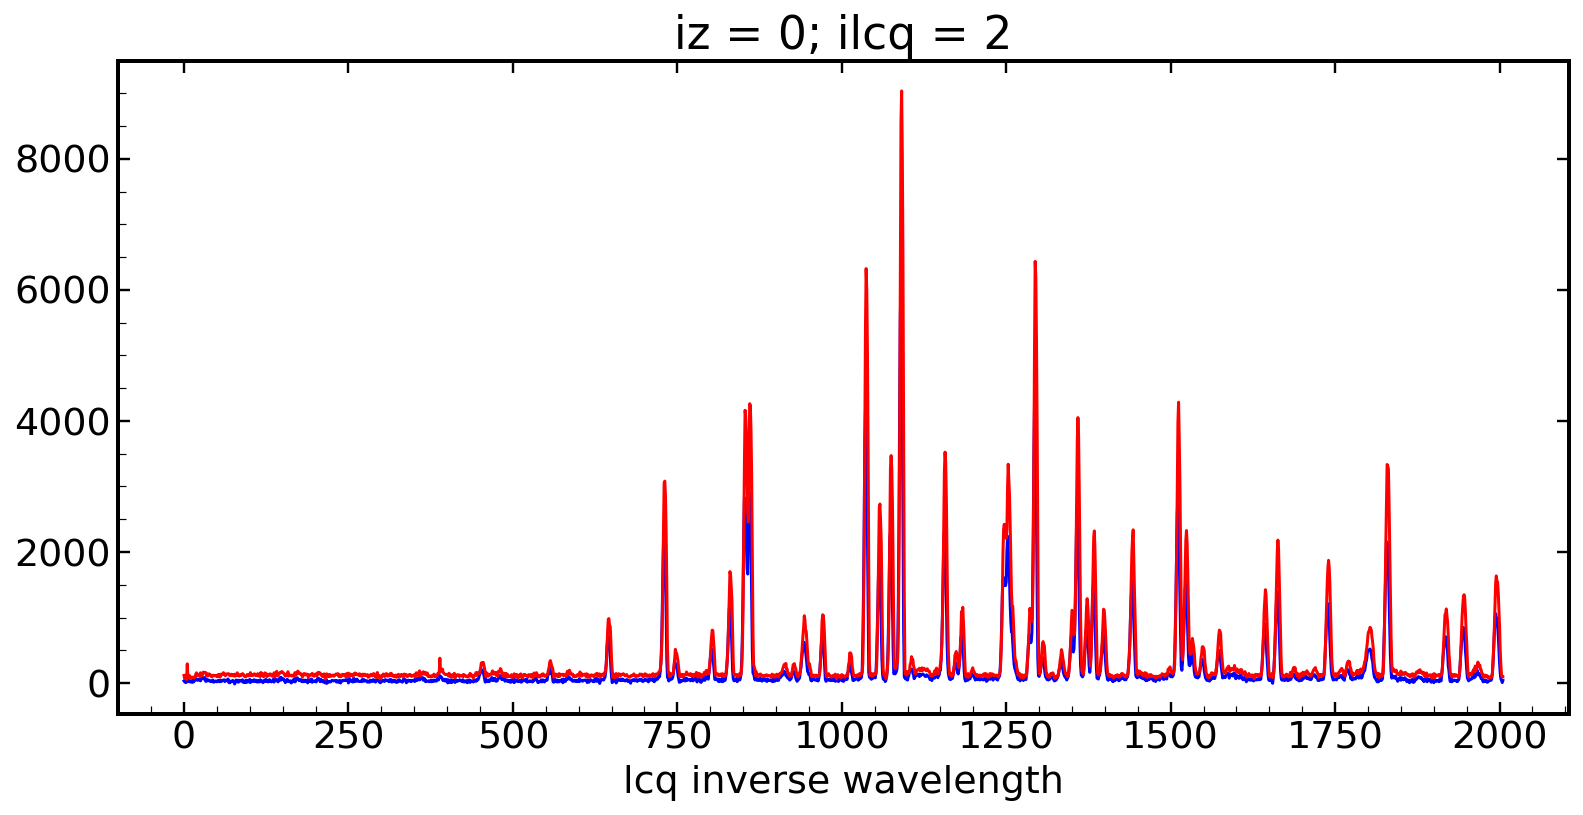

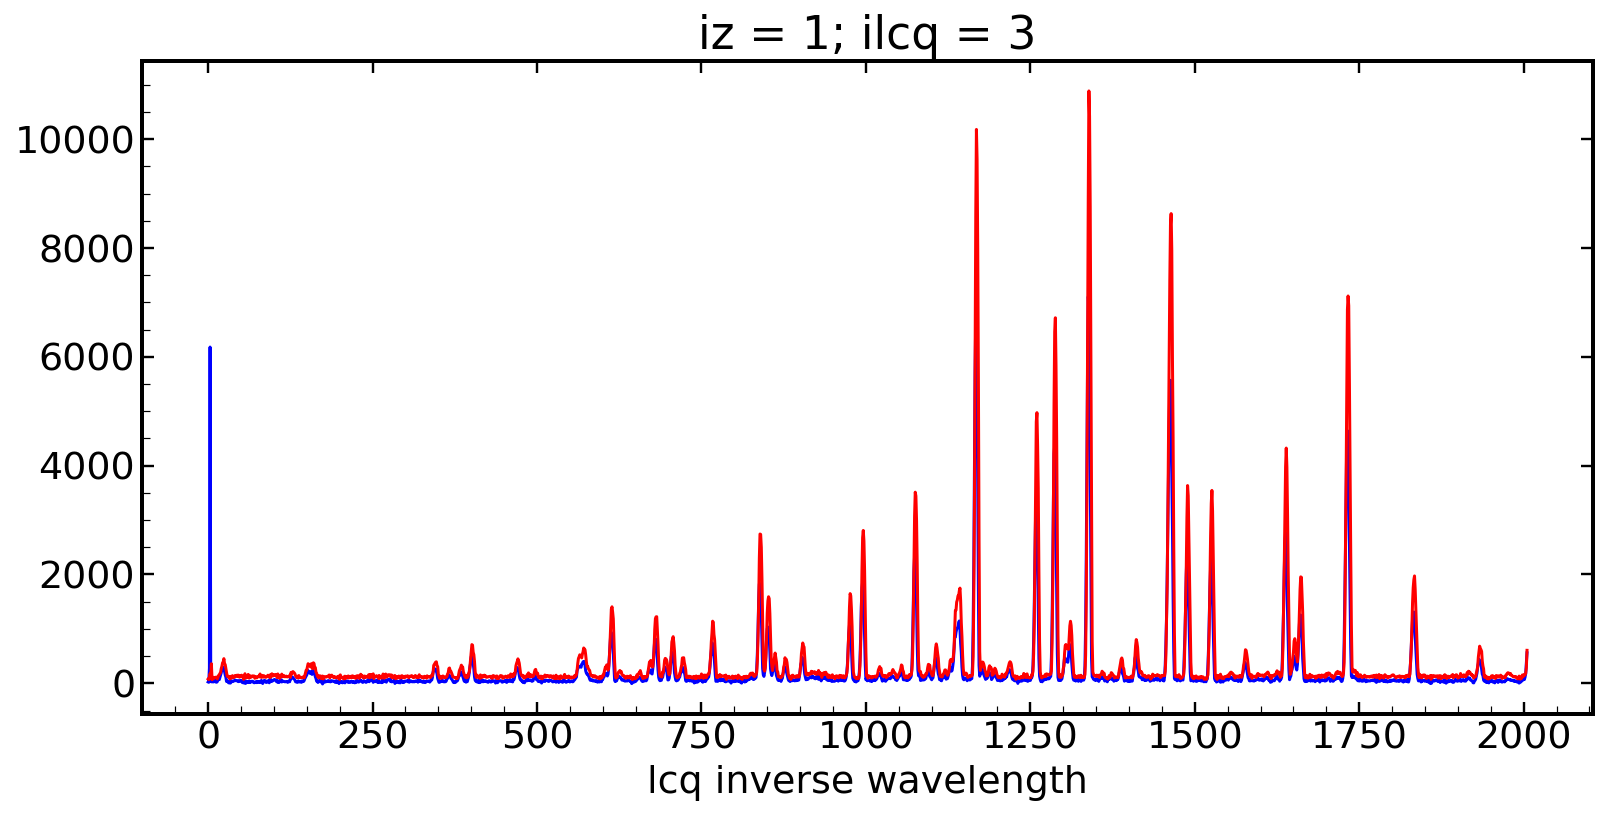

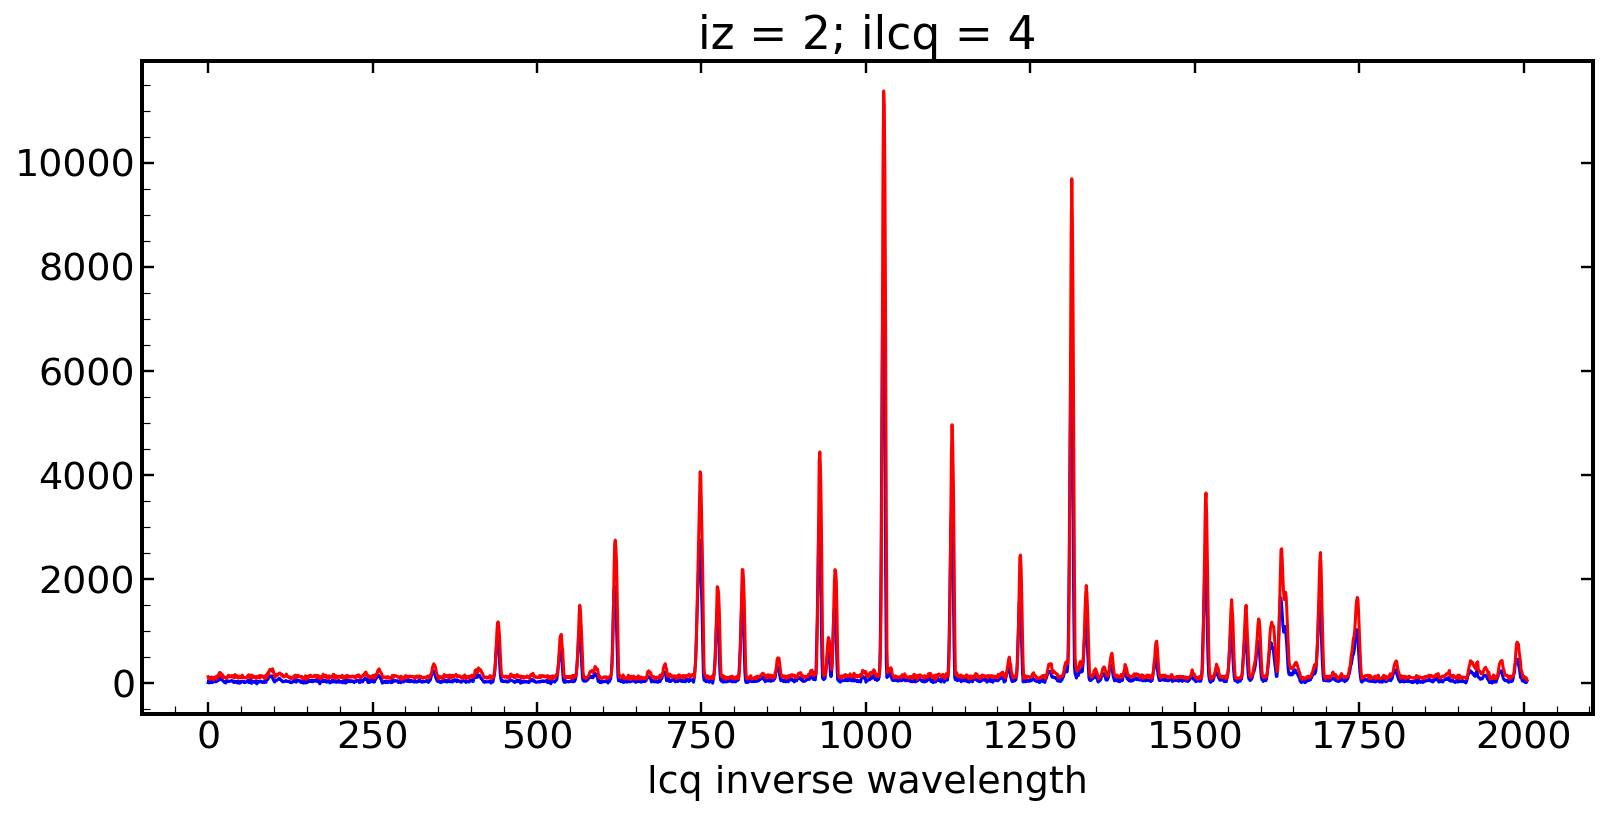

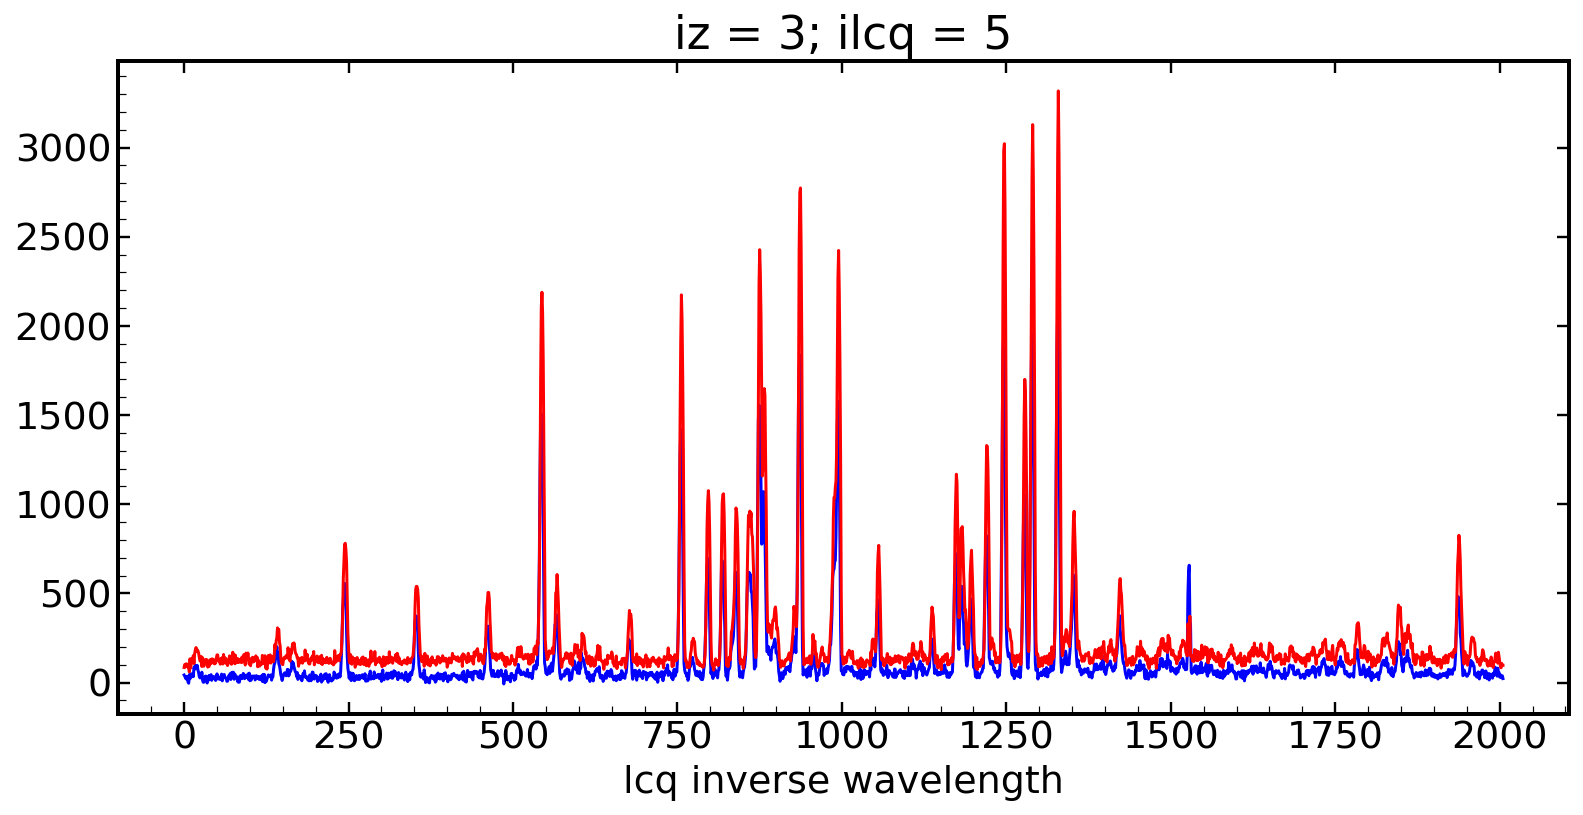

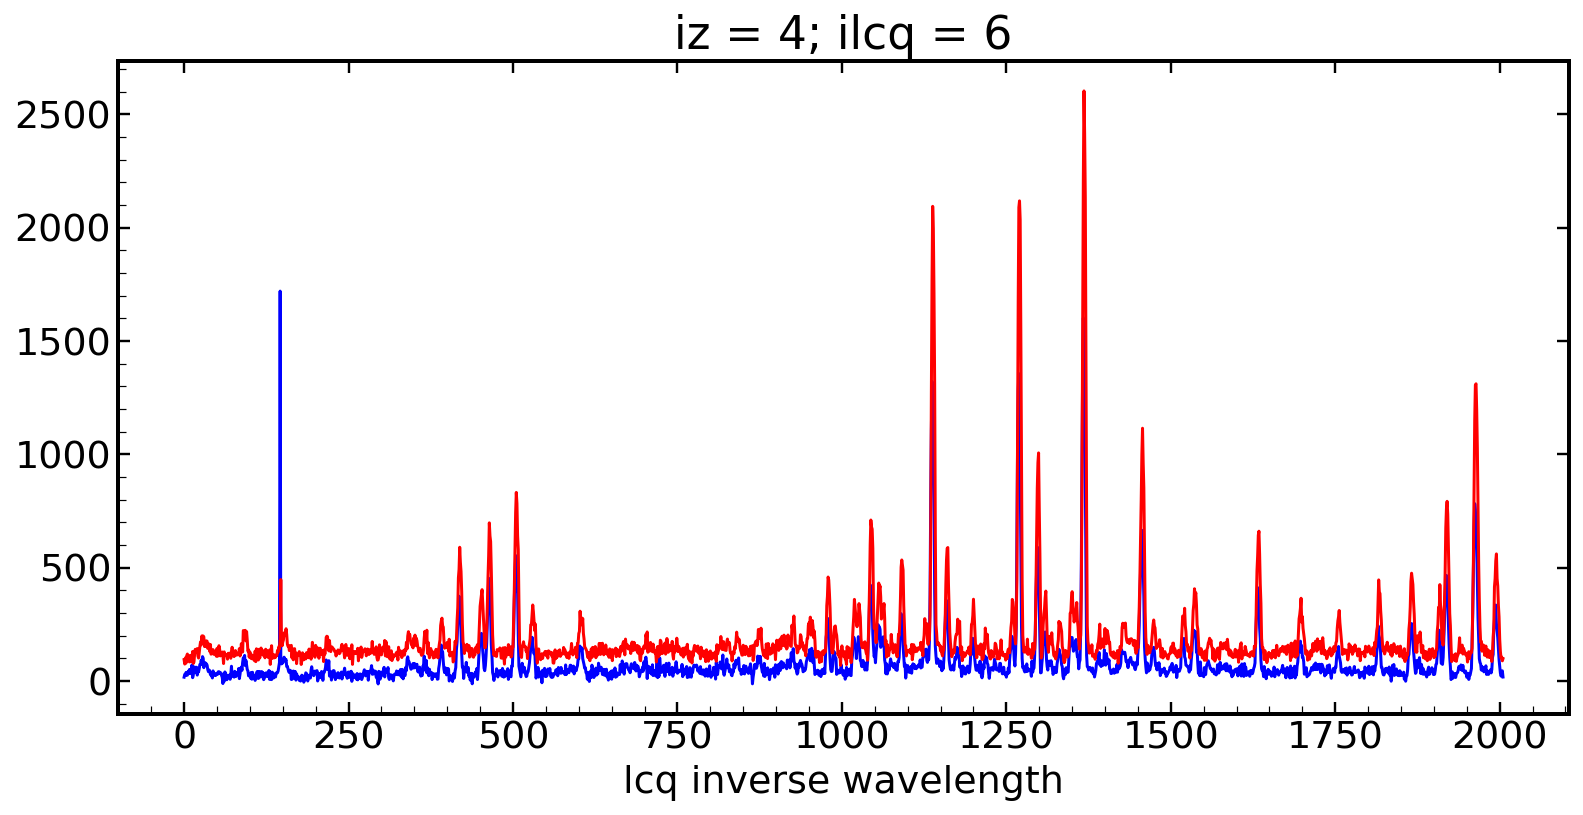

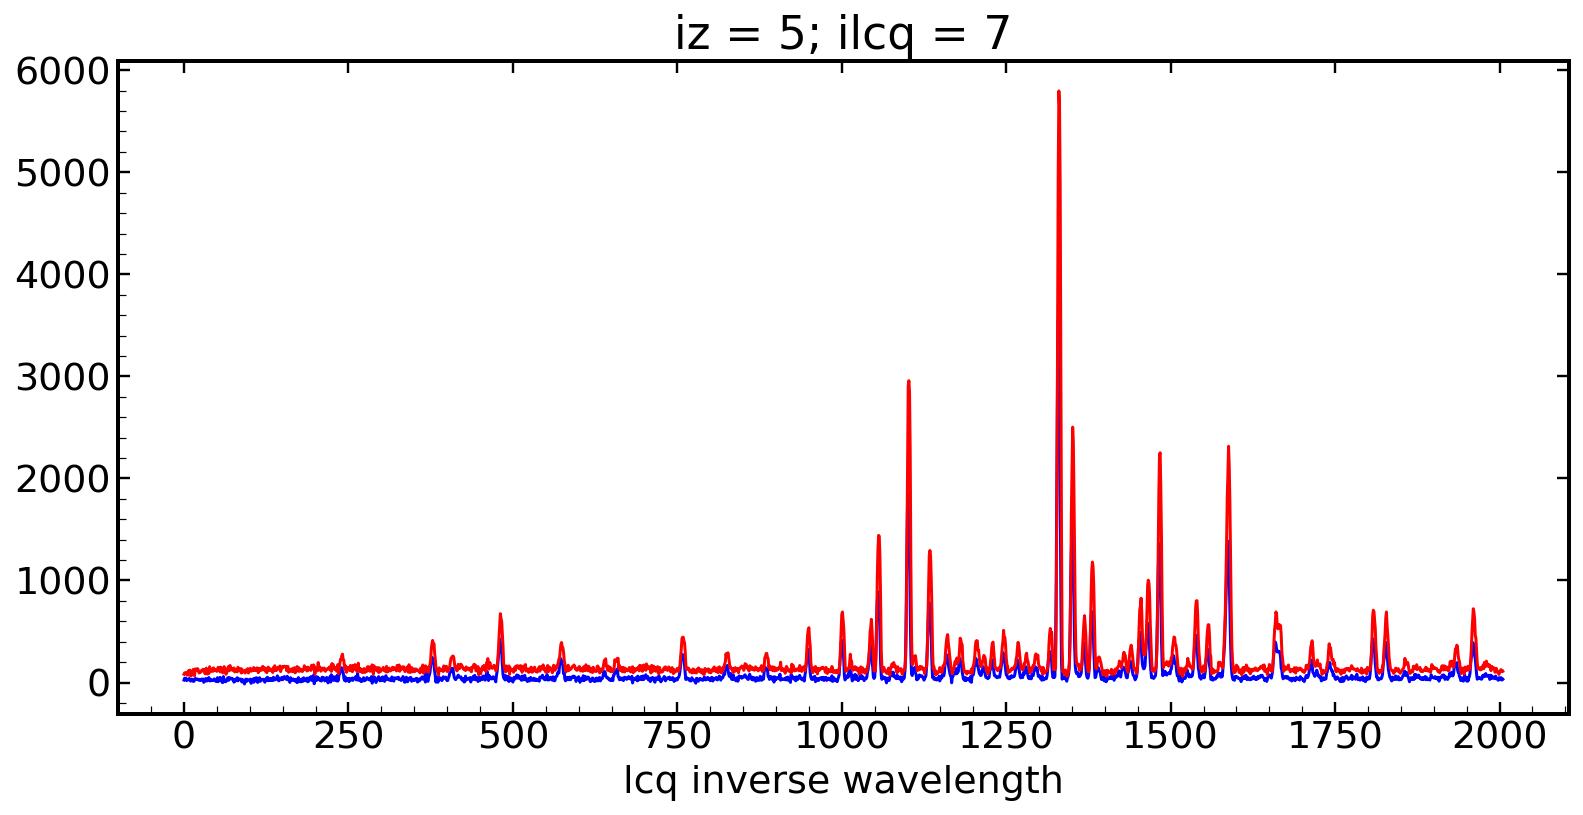

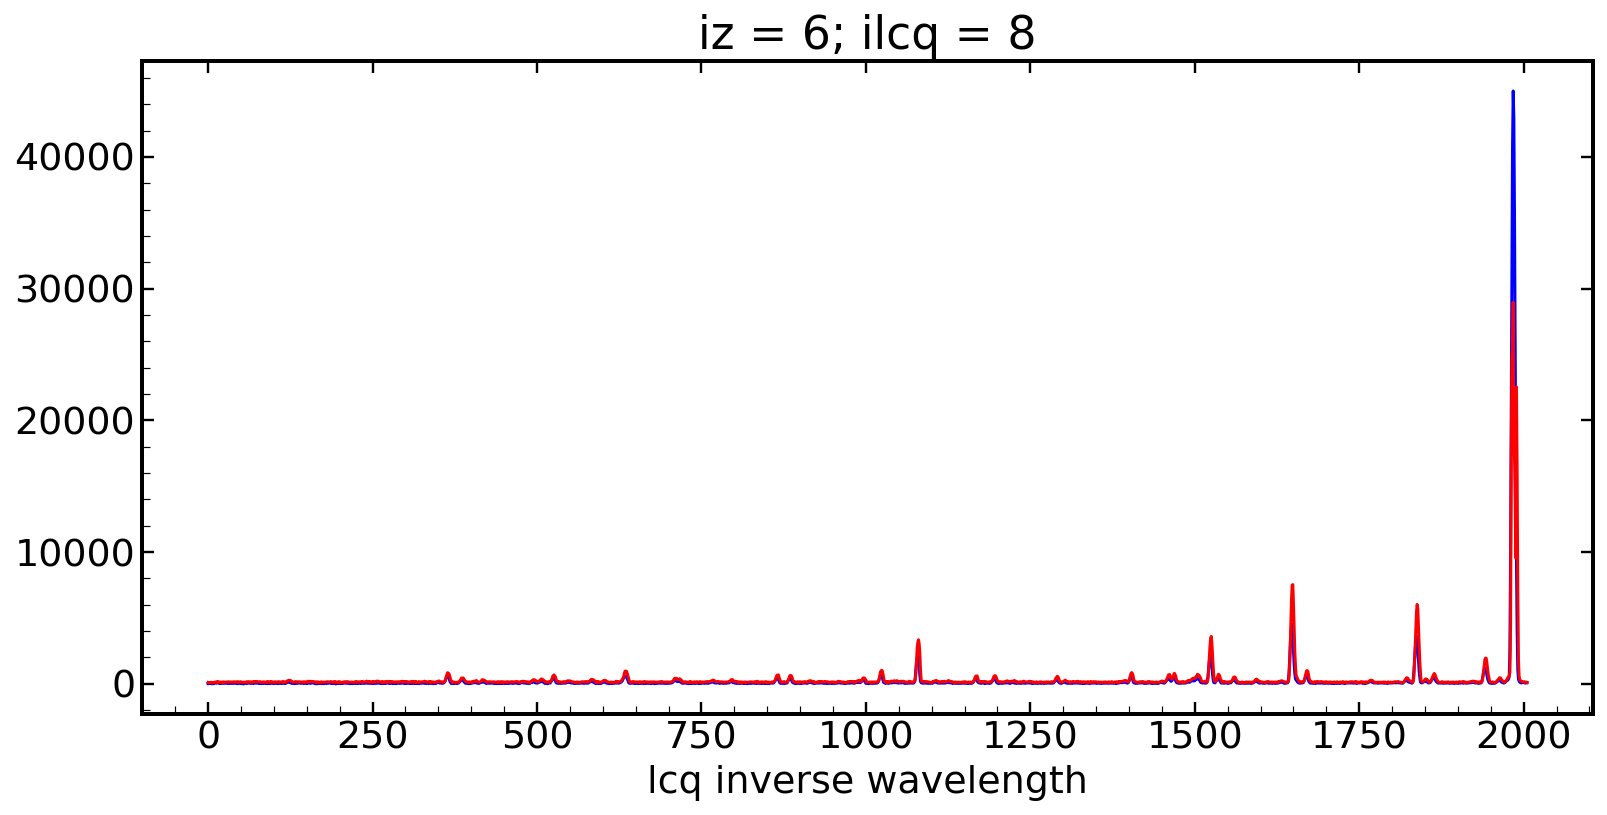

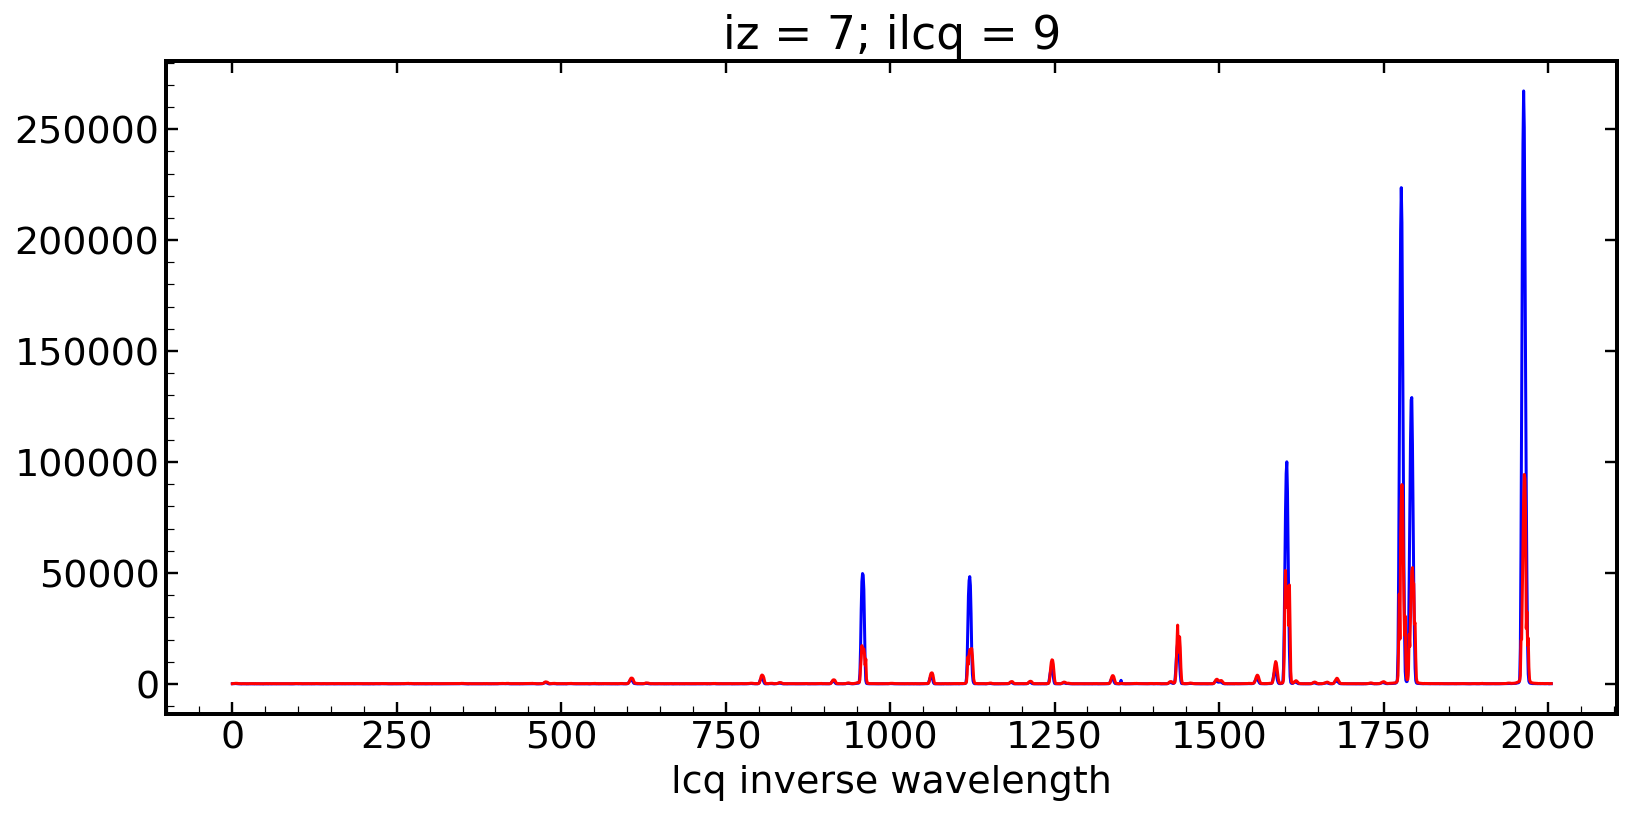

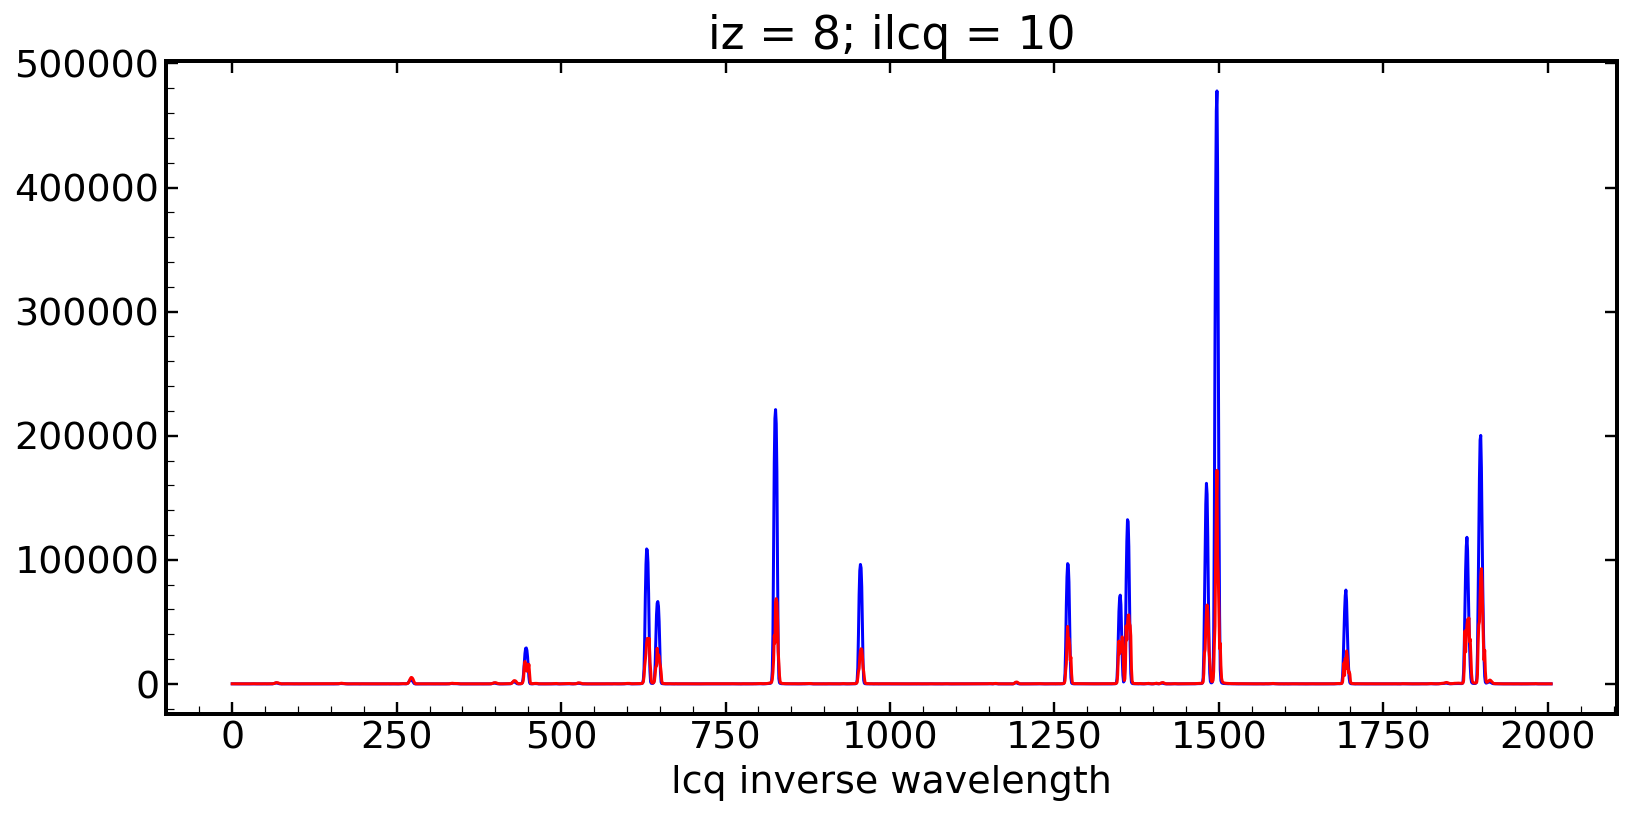

In [49]:
for _iz in [0,1,2,3,4,5,6,7,8]:
    fig, ax = plt.subplots(1,1, figsize=(13,6),sharex=True)
    plt.subplots_adjust(hspace=0)
    _ilcq = 2+_iz
    plt.xlabel('lcq inverse wavelength')
    plt.plot(data[1][_ilcq][::-1], 'b')
    plt.plot(dumpdata['spec_extr'][_iz], 'r')
    plt.title(f'iz = {_iz}; ilcq = {_ilcq}')

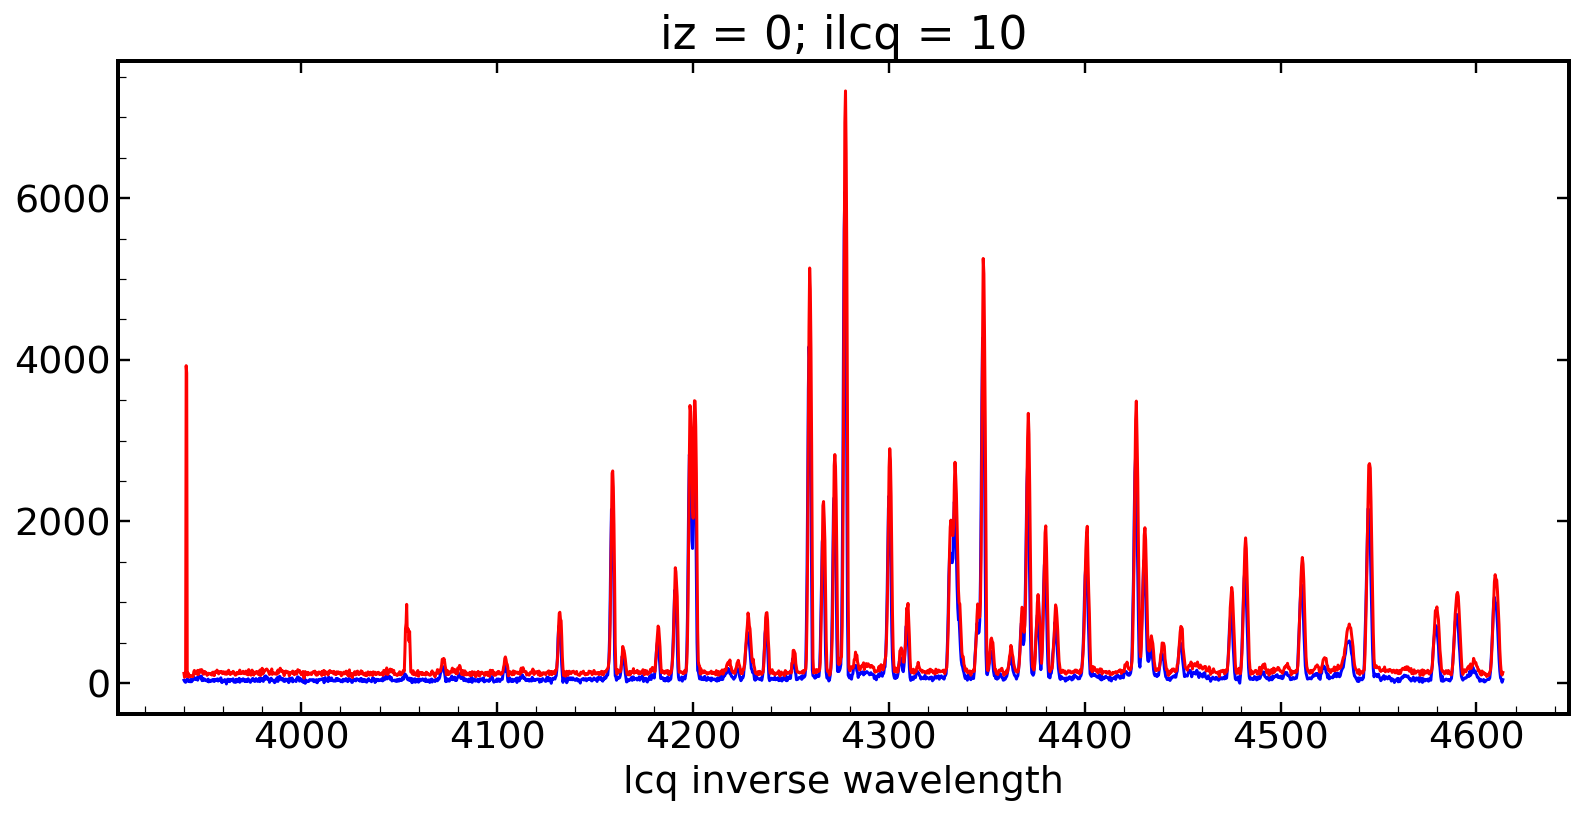

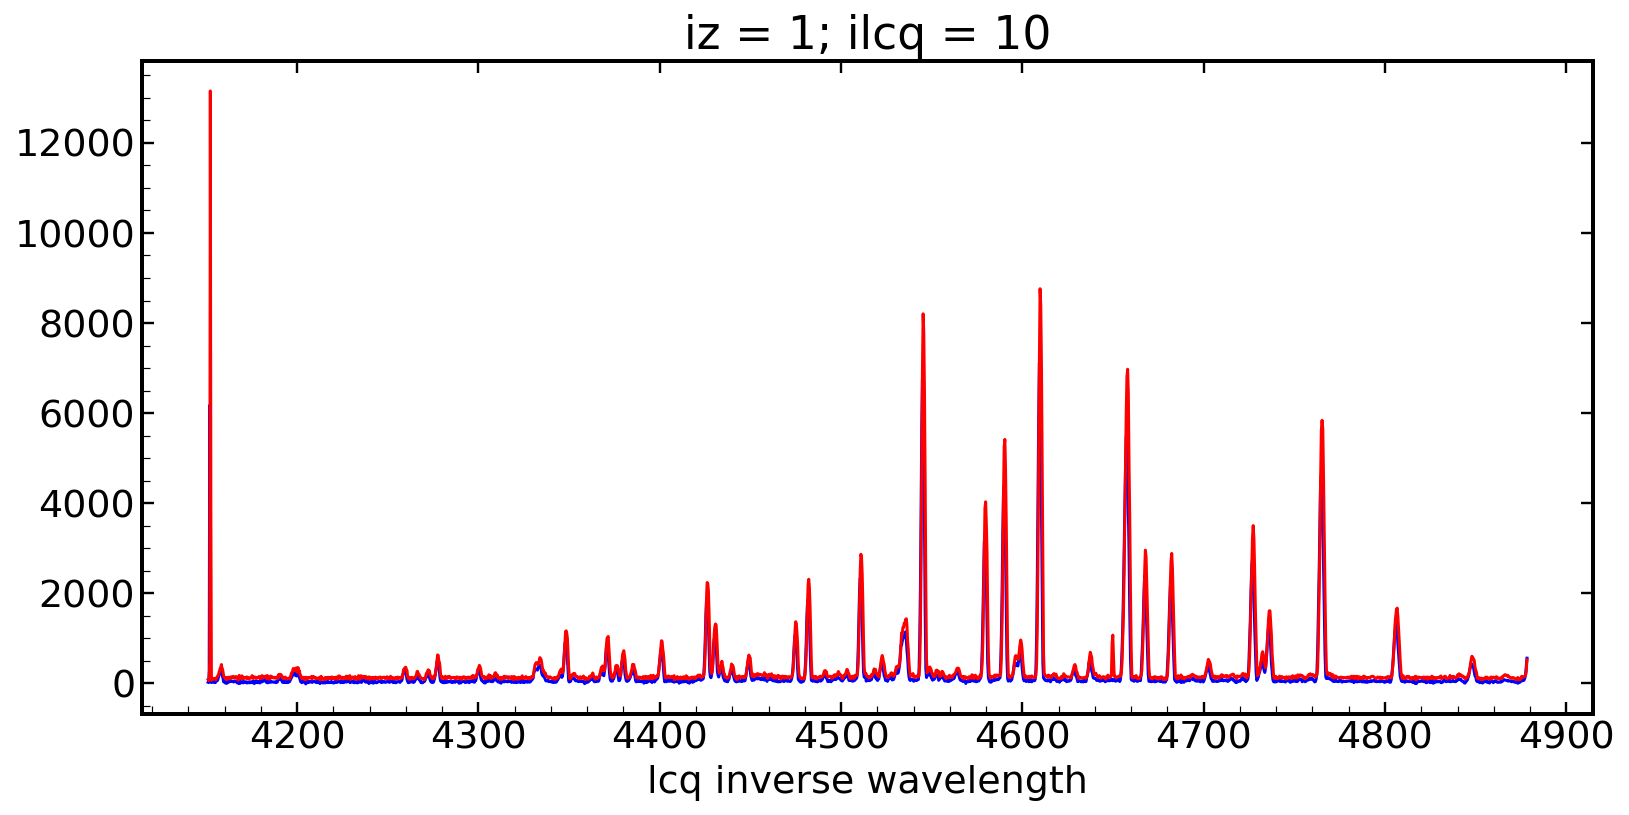

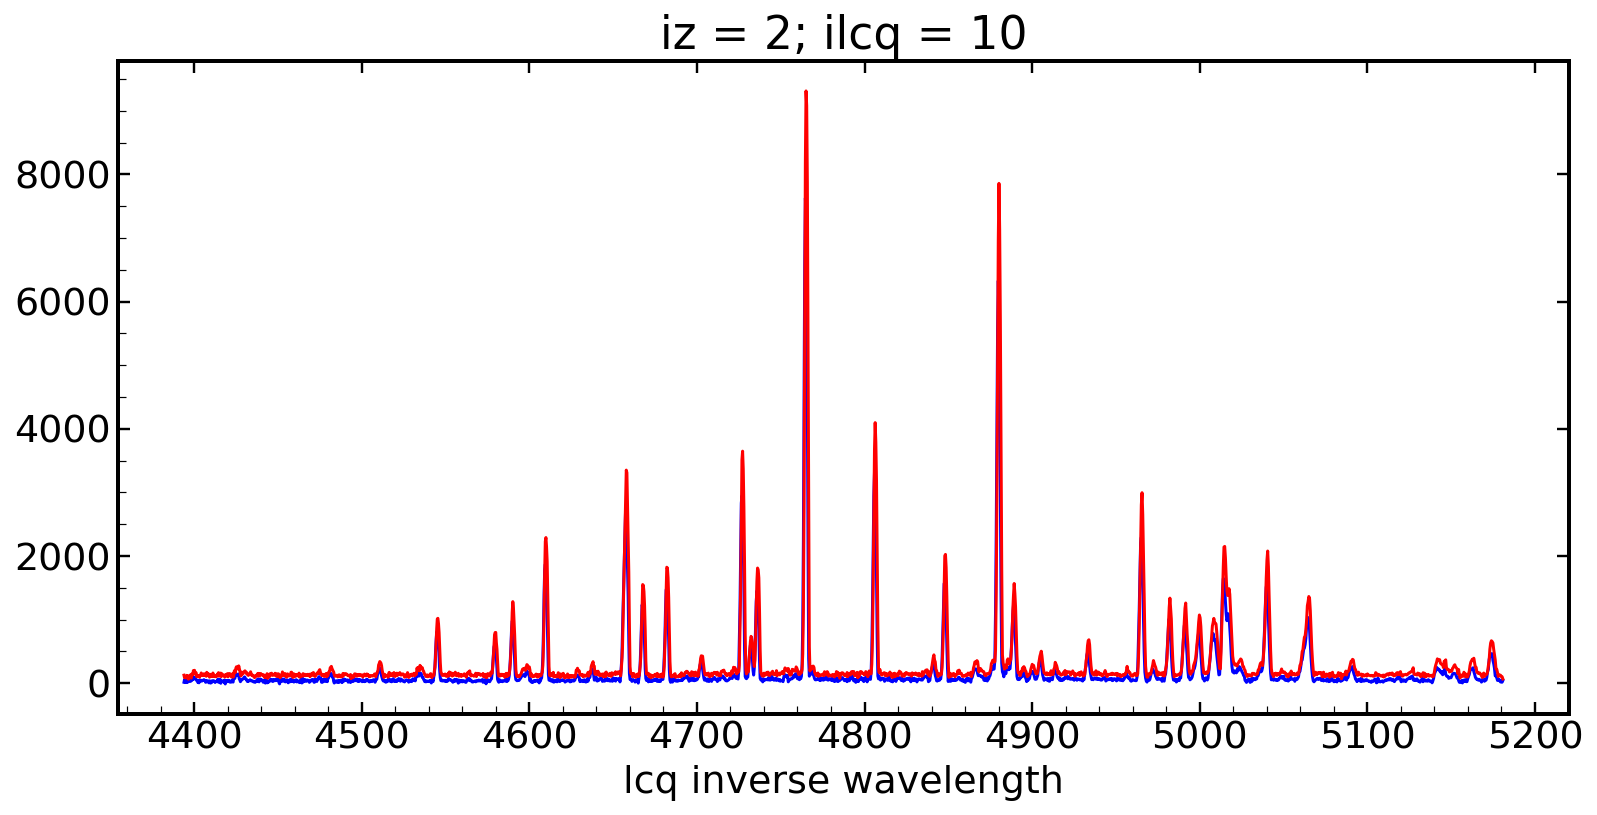

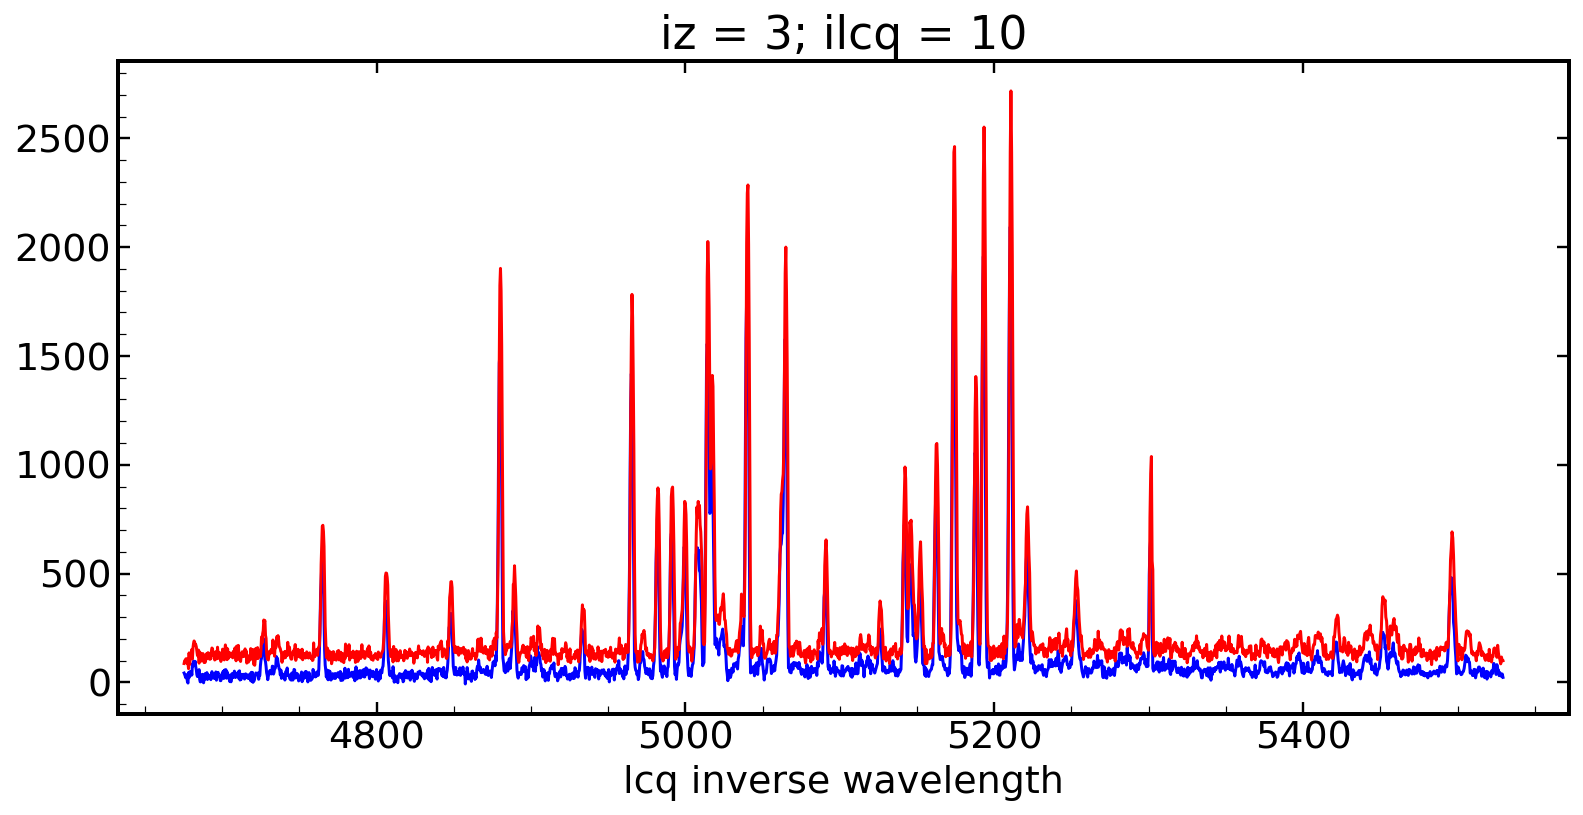

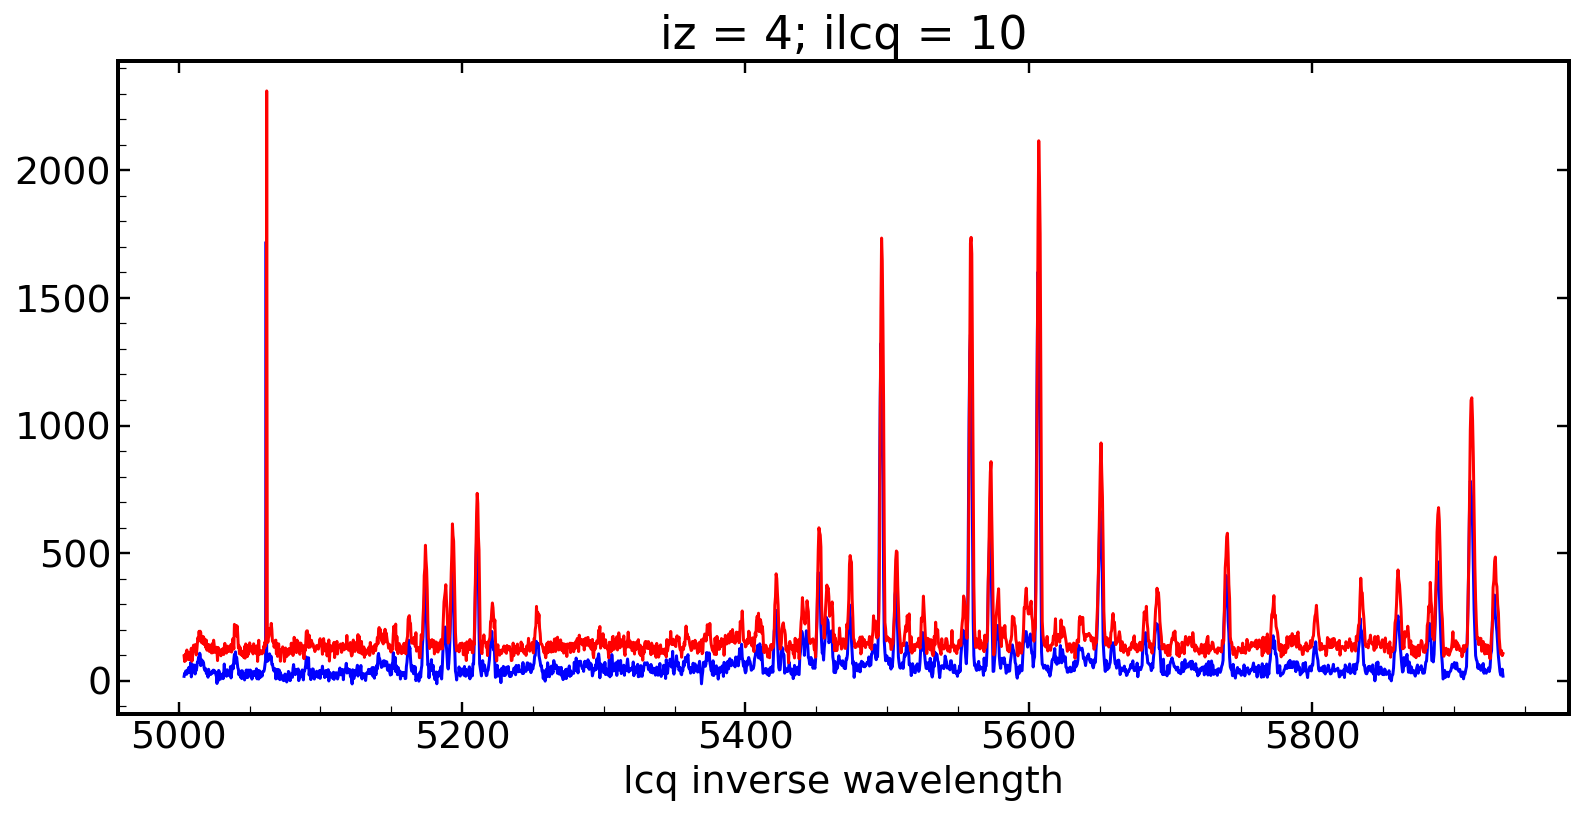

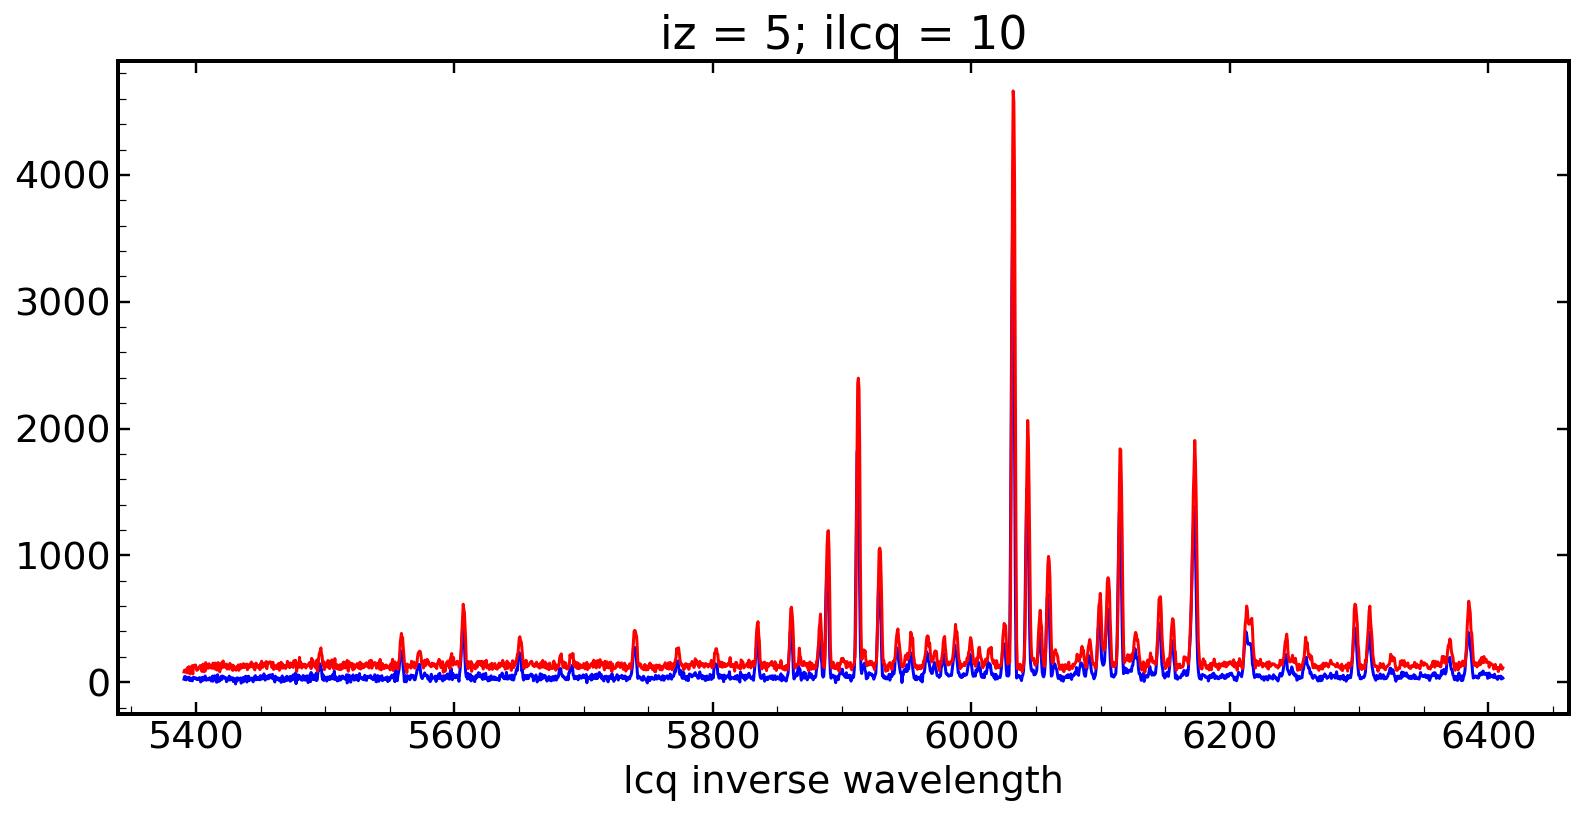

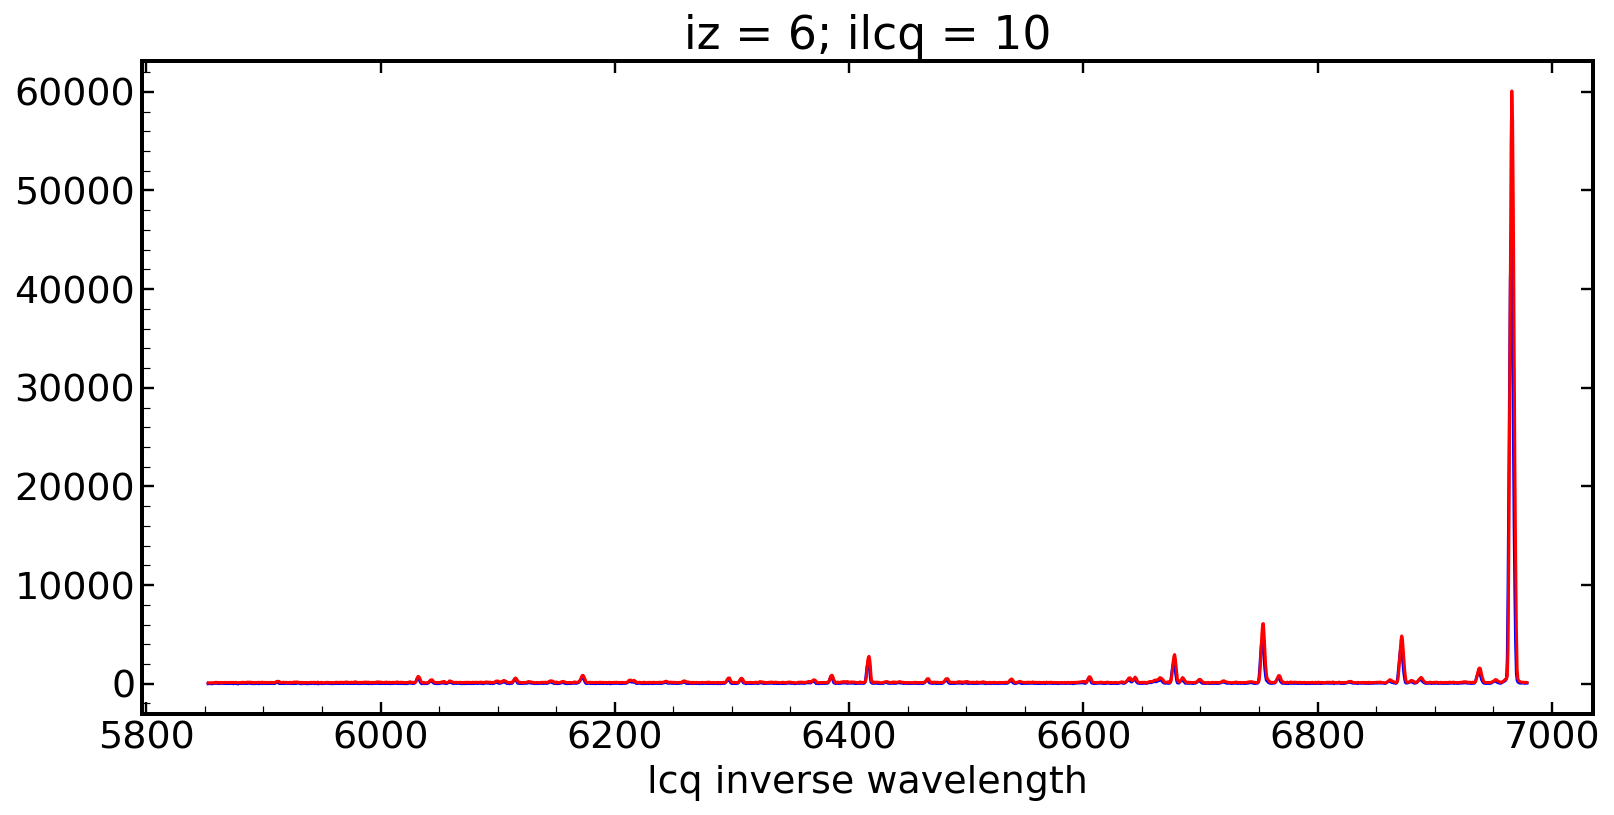

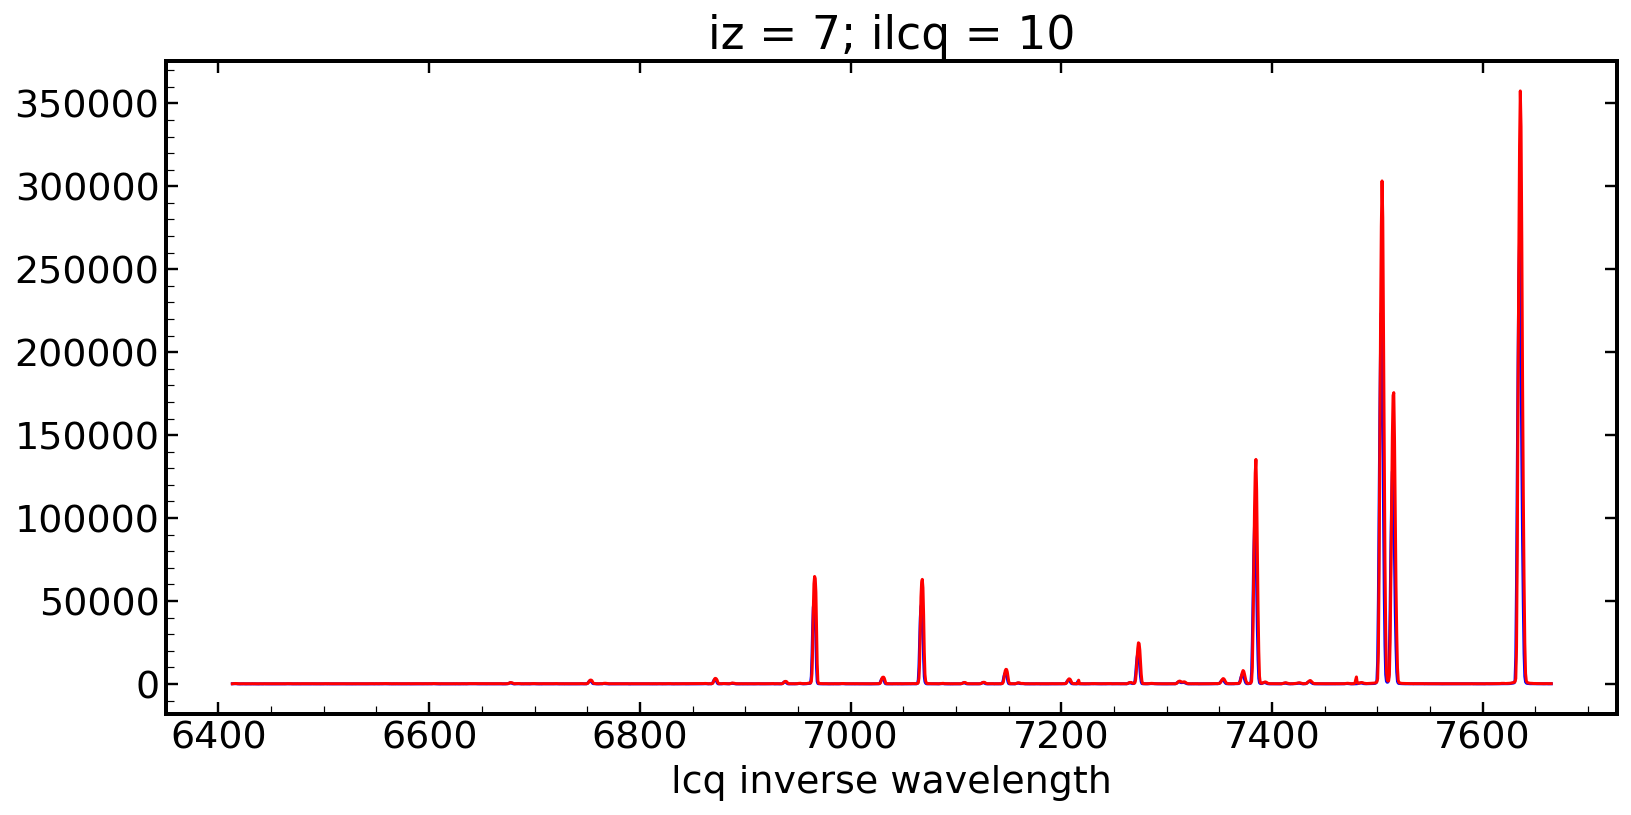

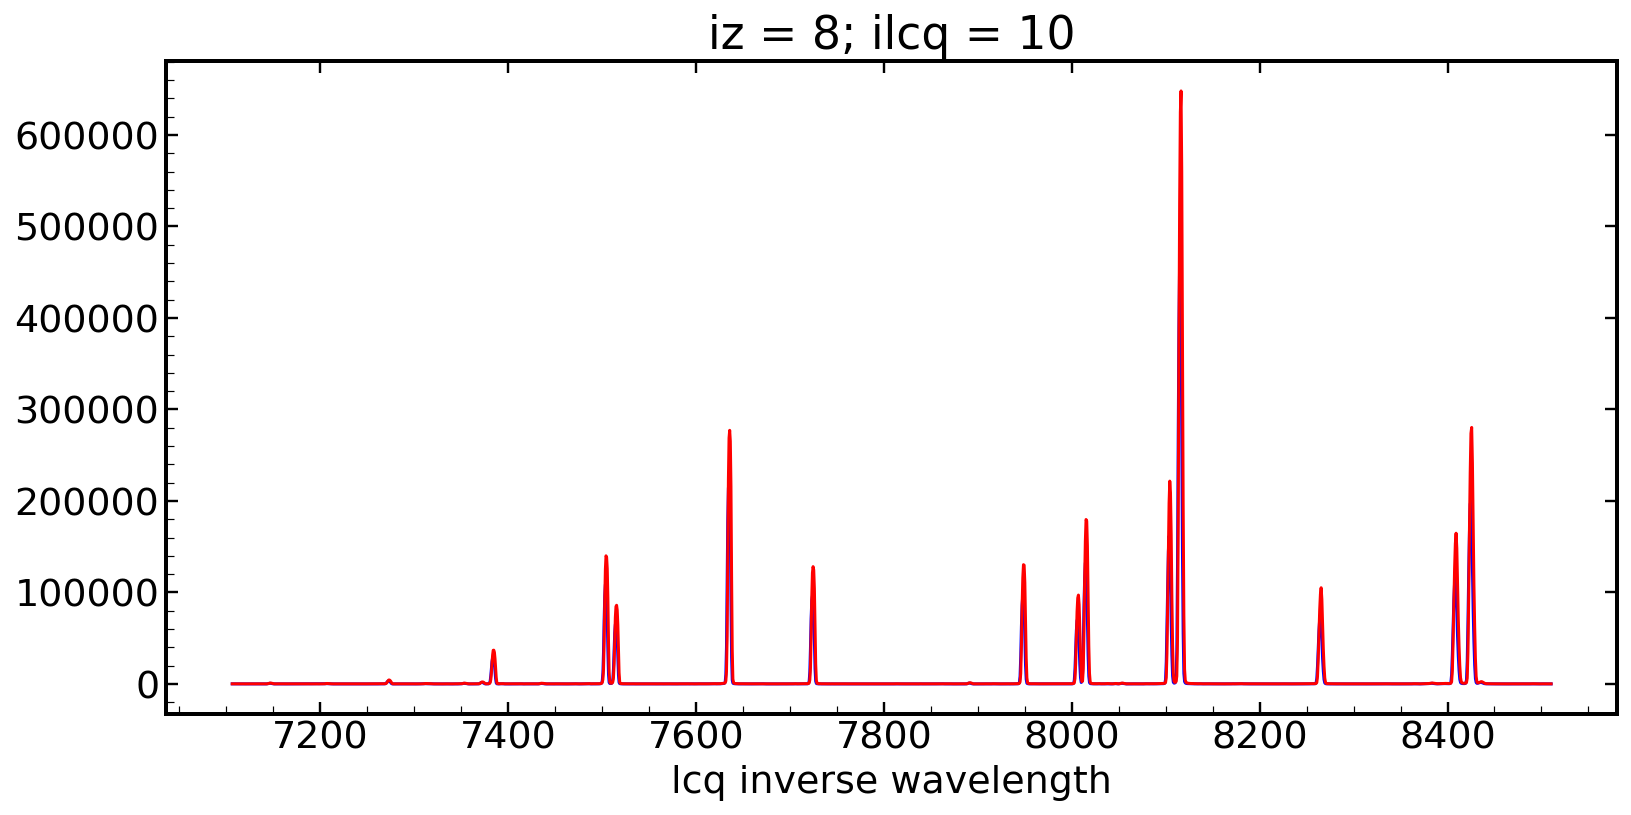

In [40]:
temp_flux = data[1][2:11, ::-1].copy()
temp_wave = waves[2:11, ::-1].copy()

for _iz in [0,1,2,3,4,5,6,7,8]:
    fig, ax = plt.subplots(1,1, figsize=(13,6),sharex=True)
    plt.xlabel('lcq inverse wavelength')
    plt.plot(temp_wave[_iz], temp_flux[_iz], 'b')
    plt.plot(temp_wave[_iz], dumpdata['spec_sum'][_iz], 'r')
    plt.title(f'iz = {_iz}')

In [59]:
template_20211023 = {'wave': temp_wave,
                    'flux': temp_flux,
                    'linelist': lamp['linelist'] }

# save lamp template

In [54]:
joblib.dump(template_20211023, '../data/template/template_20211023_order9.dump')

['../data/template/template_20211023_order9.dump']

In [52]:
temp_wave.shape

(9, 2006)

In [53]:
dumpdata['spec_extr'].shape

(9, 2006)

In [55]:
from twodspec import thar?

Object `thar` not found.


In [57]:
from twodspec import thar

In [58]:
thar.grating_equation?

Signature:
thar.grating_equation(
    x,
    y,
    z,
    deg=(4, 10),
    nsigma=3,
    min_select=None,
    verbose=True,
)
Docstring:
Fit a grating equation (2D polynomial function) to data

Parameters
----------
x : array
    x coordinates of emission lines
y : array
    order number.
z : array
    The true wavelengths of lines.
deg : tuple, optional
    The degree of the 2D polynomial. The default is (4, 10).
nsigma : float, optional
    The data outside of the nsigma*sigma radius is rejected iteratively. The default is 3.
min_select : int or None, optional
    The minimal number of selected lines. The default is None.
verbose :
    if True, print info

Returns
-------
pf1, pf2, indselect
File:      ~/anaconda3/lib/python3.7/site-packages/twodspec/thar.py
Type:      function
